<a href="https://colab.research.google.com/github/Adarshsinghparihar/Corona_detection_x-ray_Effat-University/blob/master/Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/covid-19/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import cv2
from PIL import Image
from os import listdir
import skimage
from skimage.transform import resize
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC # SVC
from sklearn.ensemble import AdaBoostClassifier # AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier # KNeighborsClassifier
from xgboost import XGBClassifier # XGBClassifier
from sklearn.ensemble import RandomForestClassifier # RandomForestClassifier

In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.layers import Input

In [ ]:
import keras
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

from tensorflow.keras.applications.vgg16 import VGG16 # VGG16
from tensorflow.keras.applications.vgg19 import VGG19 # VGG19
from tensorflow.keras.applications.resnet50 import ResNet50 # ResNet50
from tensorflow.keras.applications.resnet import ResNet50 # ResNet
from tensorflow.keras.applications.xception import Xception # Xception
from tensorflow.keras.applications.mobilenet import MobileNet # MobileNet
from tensorflow.keras.applications.nasnet import NASNetMobile # NASNetMobile
from tensorflow.keras.applications.densenet import DenseNet169 # DenseNet169
from tensorflow.keras.applications.densenet import DenseNet121 # DenseNet121
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2 # MobileNetV2
from tensorflow.keras.applications.inception_v3 import InceptionV3 # InceptionV3
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2

Using TensorFlow backend.


In [ ]:
def get_data(folder, X=[], y=[]):
 
  for folderName in listdir(folder)[:2]:
    # print(folderName) - used for debugging purposes
    if not folderName.startswith('.') and not folderName.endswith('.ipynb'): # to not consider .DS_Store and .ipynb files
      if folderName in ['normal']:
        label = 0
      elif folderName in ['corona']:
        label = 1
      # elif folderName in ['normal']:
        # label = 2 # for all other types of pnuemonia - label 2 is to be used later on
      # print(label) - used for debugging purposes
      for image_filename in tqdm(listdir(folder + folderName)):
        img_file = cv2.imread(folder + folderName + '/' + image_filename)
        if img_file is not None:
          img_file = skimage.transform.resize(img_file, (224, 224, 3))
          img_arr = np.asarray(img_file)
          X.append(img_arr)
          y.append(label)
  X = np.asarray(X)
  y = np.asarray(y)
  return X,y


In [ ]:
def result(y_test,y_pred_test,name):
    confmat = confusion_matrix(y_test.argmax(axis=1),y_pred_test.argmax(axis=1))
    #Plot Confusion Matrix 
    plt.figure(figsize=(4,4))
    sns.heatmap(confmat, cmap='coolwarm', linecolor='white', linewidths=1, annot=True, fmt='d')
    plt.title('Confusion Matrix '+'('+ str(name) + ')' )
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    fig = plt.gcf()
    plt.show();

    print('Accuracy:', np.round(accuracy_score(y_test.argmax(axis=1),y_pred_test.argmax(axis=1)),4))
    print('Precision:', np.round(precision_score(y_test.argmax(axis=1),y_pred_test.argmax(axis=1)),4))
    print('F1 Score:', np.round(f1_score(y_test.argmax(axis=1),y_pred_test.argmax(axis=1)),4))
    print('Cohen Kappa Score:', np.round(cohen_kappa_score(y_test.argmax(axis=1),y_pred_test.argmax(axis=1)),4))
    print('ROC AUC Score:', np.round(roc_auc_score(y_test.argmax(axis=1),y_pred_test.argmax(axis=1)),4))
    print('Recall:', np.round(recall_score(y_test.argmax(axis=1),y_pred_test.argmax(axis=1)),4))

    print('\t\tClassification Report:\n', classification_report(y_test.argmax(axis=1),y_pred_test.argmax(axis=1)))

In [ ]:
def result_1(y_train,y_pred_train,name):
    confmat = confusion_matrix(y_train.argmax(axis=1),y_pred_train)
    #Plot Confusion Matrix 
    plt.figure(figsize=(4,4))
    sns.heatmap(confmat, cmap='coolwarm', linecolor='white', linewidths=1, annot=True, fmt='d')
    plt.title('Confusion Matrix '+'('+ str(name) + ')' )
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    fig = plt.gcf()
    plt.show();

    print('Accuracy:', np.round(accuracy_score(y_train.argmax(axis=1),y_pred_train),4))
    print('Precision:', np.round(precision_score(y_train.argmax(axis=1),y_pred_train),4))
    print('F1 Score:', np.round(f1_score(y_train.argmax(axis=1),y_pred_train),4))
    print('Cohen Kappa Score:', np.round(cohen_kappa_score(y_train.argmax(axis=1),y_pred_train),4))
    print('ROC AUC Score:', np.round(roc_auc_score(y_train.argmax(axis=1),y_pred_train),4))
    print('Recall:', np.round(recall_score(y_train.argmax(axis=1),y_pred_train),4))
    print('\t\tClassification Report:\n', classification_report(y_train.argmax(axis=1),y_pred_train))

In [ ]:
def plot(name):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(str(name)+' accuracy plot')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(str(name)+' loss plot')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [ ]:
X,y = get_data(path)

100%|██████████| 1595/1595 [32:44<00:00,  1.23s/it]


In [ ]:
print(len(X), len(y))


1882 1882


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(*shuffle(X, y), test_size=0.1, random_state=1234)
X_train, X_val, y_train, y_val = train_test_split(*shuffle(X_train, y_train), test_size=0.1, random_state=1234)
del X,y

In [ ]:
y_train = to_categorical(y_train, num_classes=2)  
y_test = to_categorical(y_test, num_classes=2)  
y_val = to_categorical(y_val, num_classes=2)  

#VGG 16


In [ ]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.layers import Input

In [ ]:
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing


# initialize the training data augmentation object
# # trainAug = ImageDataGenerator(
# 	rotation_range=15,
# 	fill_mode="nearest")

# load the VGG16 network, ensuring the head FC layer sets are left
# off
# baseModel = VGG16(weights="/content/drive/My Drive/Covid-19 project/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5", include_top=False,
# 	input_tensor=Input(shape=(224, 224, 3)))

baseModel = VGG16(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.4)(headModel)

predictions = Dense(2, activation='softmax')(headModel)


# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=predictions)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

# compile our model
print("[INFO] compiling model...")
opt=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])


# train the head of the network
print("[INFO] training head...")
# H = model.fit_generator(
# 	trainAug.flow(trainX, trainY, batch_size=BS),
# 	steps_per_epoch=len(trainX) // BS,
# 	validation_data=(testX, testY),
# 	validation_steps=len(testX) // BS,
# 	epochs=EPOCHS
# 	callbacks = [cp_callback])

history= model.fit(X_train, y_train, epochs=10, verbose=1, validation_split=0.1)
print('CV accuracy:' , np.average(history.history['val_accuracy'])) 

[INFO] compiling model...
[INFO] training head...
Epoch 1/10
43/43 [==============================] - 20s 460ms/step - loss: 0.3685 - accuracy: 0.8540 - val_loss: 0.2110 - val_accuracy: 0.8954
Epoch 2/10
43/43 [==============================] - 14s 330ms/step - loss: 0.1587 - accuracy: 0.9474 - val_loss: 0.1388 - val_accuracy: 0.9412
Epoch 3/10
43/43 [==============================] - 14s 329ms/step - loss: 0.1043 - accuracy: 0.9657 - val_loss: 0.1011 - val_accuracy: 0.9608
Epoch 4/10
43/43 [==============================] - 14s 329ms/step - loss: 0.0871 - accuracy: 0.9715 - val_loss: 0.0962 - val_accuracy: 0.9608
Epoch 5/10
43/43 [==============================] - 14s 329ms/step - loss: 0.0766 - accuracy: 0.9781 - val_loss: 0.0721 - val_accuracy: 0.9673
Epoch 6/10
43/43 [==============================] - 14s 330ms/step - loss: 0.0656 - accuracy: 0.9774 - val_loss: 0.0606 - val_accuracy: 0.9739
Epoch 7/10
43/43 [==============================] - 14s 330ms/step - loss: 0.0531 - accuracy

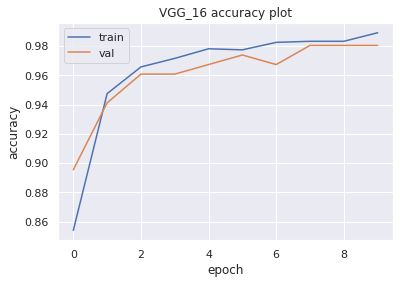

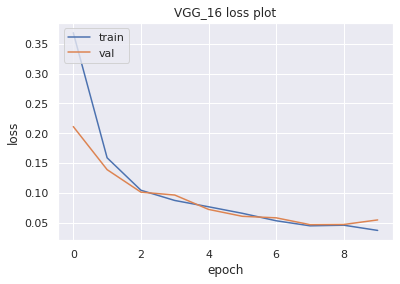

In [ ]:
plot('VGG_16')

48/48 [==============================] - 14s 288ms/step - loss: 0.0347 - accuracy: 0.9869
Score train:  [0.0347350537776947, 0.9868680238723755]


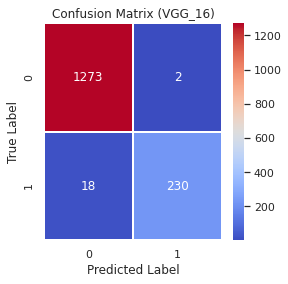

Accuracy: 0.9869
Precision: 0.9914
F1 Score: 0.9583
Cohen Kappa Score: 0.9505
ROC AUC Score: 0.9629
Recall: 0.9274
		Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1275
           1       0.99      0.93      0.96       248

    accuracy                           0.99      1523
   macro avg       0.99      0.96      0.98      1523
weighted avg       0.99      0.99      0.99      1523



In [ ]:
y_pred_train = model.predict(X_train)
print('Score train: ', model.evaluate(X_train, y_train))
result(y_train,y_pred_train,'VGG_16')

6/6 [==============================] - 1s 220ms/step - loss: 0.0253 - accuracy: 0.9882
Score train:  [0.02529028244316578, 0.9882352948188782]


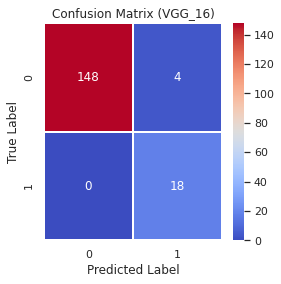

Accuracy: 0.9765
Precision: 0.8182
F1 Score: 0.9
Cohen Kappa Score: 0.8868
ROC AUC Score: 0.9868
Recall: 1.0
		Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       152
           1       0.82      1.00      0.90        18

    accuracy                           0.98       170
   macro avg       0.91      0.99      0.94       170
weighted avg       0.98      0.98      0.98       170



In [ ]:
y_pred_val = model.predict(X_val)
print('Score train: ', model.evaluate(X_val, y_val))
result(y_val,y_pred_val,'VGG_16')

6/6 [==============================] - 1s 240ms/step - loss: 0.0603 - accuracy: 0.9841
Score train:  [0.06026941537857056, 0.9841269850730896]


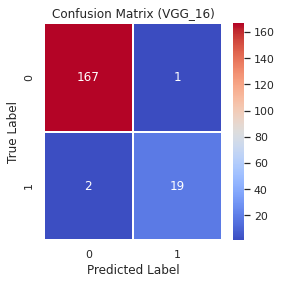

Accuracy: 0.9841
Precision: 0.95
F1 Score: 0.9268
Cohen Kappa Score: 0.9179
ROC AUC Score: 0.9494
Recall: 0.9048
		Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       168
           1       0.95      0.90      0.93        21

    accuracy                           0.98       189
   macro avg       0.97      0.95      0.96       189
weighted avg       0.98      0.98      0.98       189



In [ ]:
y_pred_test = model.predict(X_test)
print('Score train: ', model.evaluate(X_test, y_test))
result(y_test,y_pred_test,'VGG_16')
    

#2-CNN


In [ ]:
name = '2-CNN'
# Initialising the CNN
model= Sequential()

# Step 1 - Convolution
model.add(Conv2D(32, (3, 3), input_shape = (224, 224, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

# Adding a second convolutional layer
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

# Step 3 - Flattening
model.add(Flatten())

# Step 4 - Full connection
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 2, activation = 'sigmoid'))

# Compiling the CNN
#optim=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
optim=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

model.compile(optimizer = optim, loss = 'binary_crossentropy', metrics = ['accuracy'])

#summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 54, 54, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 186624)           

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

'''history=model_3_hidden.fit_generator((X_train,y_train),
                         steps_per_epoch = 100,
                         epochs = 25,
                         validation_data = X_test,y_test)
'''
history= model.fit(X_train, y_train, epochs=15, verbose=1, validation_split=0.1)
print('CV accuracy:' , np.average(history.history['val_accuracy'])) 

Train on 1370 samples, validate on 153 samples
Epoch 1/15
1370/1370 [==============================] - 7s 5ms/step - loss: 0.5487 - accuracy: 0.8726 - val_loss: 0.1304 - val_accuracy: 0.9575
Epoch 2/15
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1111 - accuracy: 0.9599 - val_loss: 0.1468 - val_accuracy: 0.9706
Epoch 3/15
1370/1370 [==============================] - 6s 4ms/step - loss: 0.0765 - accuracy: 0.9723 - val_loss: 0.1125 - val_accuracy: 0.9641
Epoch 4/15
1370/1370 [==============================] - 6s 4ms/step - loss: 0.0582 - accuracy: 0.9788 - val_loss: 0.0703 - val_accuracy: 0.9771
Epoch 5/15
1370/1370 [==============================] - 6s 4ms/step - loss: 0.0688 - accuracy: 0.9734 - val_loss: 0.1147 - val_accuracy: 0.9673
Epoch 6/15
1370/1370 [==============================] - 6s 4ms/step - loss: 0.0562 - accuracy: 0.9796 - val_loss: 0.0708 - val_accuracy: 0.9706
Epoch 7/15
1370/1370 [==============================] - 6s 4ms/step - loss: 0.0352 - accu

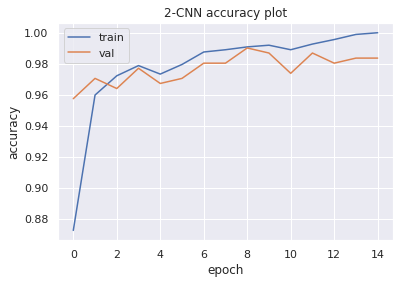

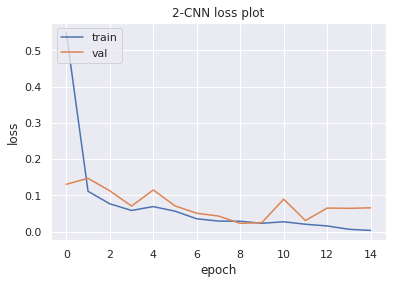

In [ ]:
plot (name)

1523/1523 [==============================] - 3s 2ms/step
Score train:  [0.011033664125758355, 0.9980301856994629]


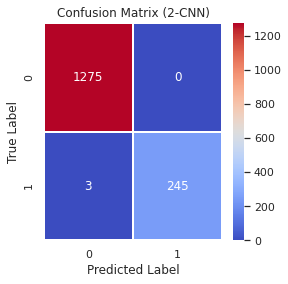

Accuracy: 0.998
Precision: 1.0
F1 Score: 0.9939
Cohen Kappa Score: 0.9927
ROC AUC Score: 0.994
Recall: 0.9879
		Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1275
           1       1.00      0.99      0.99       248

    accuracy                           1.00      1523
   macro avg       1.00      0.99      1.00      1523
weighted avg       1.00      1.00      1.00      1523



In [ ]:
y_pred_train = model.predict(X_train)
print('Score train: ', model.evaluate(X_train, y_train))
result(y_train,y_pred_train,name)

170/170 [==============================] - 0s 2ms/step
Score train:  [0.04741307323223309, 0.979411780834198]


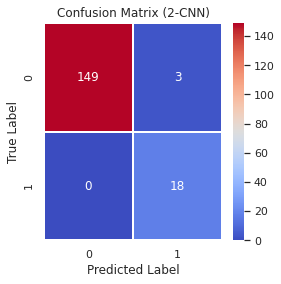

Accuracy: 0.9824
Precision: 0.8571
F1 Score: 0.9231
Cohen Kappa Score: 0.9132
ROC AUC Score: 0.9901
Recall: 1.0
		Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       152
           1       0.86      1.00      0.92        18

    accuracy                           0.98       170
   macro avg       0.93      0.99      0.96       170
weighted avg       0.98      0.98      0.98       170



In [ ]:
y_pred_val = model.predict(X_val)
print('Score train: ', model.evaluate(X_val, y_val))
result(y_val,y_pred_val,name)

189/189 [==============================] - 0s 2ms/step
Score train:  [0.03704600570053256, 0.9841269850730896]


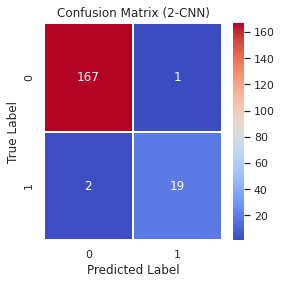

Accuracy: 0.9841
Precision: 0.95
F1 Score: 0.9268
Cohen Kappa Score: 0.9179
ROC AUC Score: 0.9494
Recall: 0.9048
		Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       168
           1       0.95      0.90      0.93        21

    accuracy                           0.98       189
   macro avg       0.97      0.95      0.96       189
weighted avg       0.98      0.98      0.98       189



In [ ]:
y_pred_test = model.predict(X_test)
print('Score train: ', model.evaluate(X_test, y_test))
result(y_test,y_pred_test,name)
    

#3-CNN


In [ ]:
name = '3-CNN'
# Initialising the CNN
model= Sequential()

# Step 1 - Convolution
model.add(Conv2D(32, (3, 3), input_shape = (224, 224, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

# Adding a second convolutional layer
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

# Adding a third convolutional layer
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))


# Step 3 - Flattening
model.add(Flatten())

# Step 4 - Full connection
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 2, activation = 'sigmoid'))

# Compiling the CNN
#optim=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
optim=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

model.compile(optimizer = optim, loss = 'binary_crossentropy', metrics = ['accuracy'])

#summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 52, 52, 64)       

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

'''history=model_3_hidden.fit_generator((X_train,y_train),
                         steps_per_epoch = 100,
                         epochs = 25,
                         validation_data = X_test,y_test)
'''
history= model.fit(X_train, y_train, epochs=15, verbose=1, validation_split=0.1)
print('CV accuracy:' , np.average(history.history['val_accuracy'])) 

Train on 1370 samples, validate on 153 samples
Epoch 1/15
1370/1370 [==============================] - 6s 4ms/step - loss: 0.4775 - accuracy: 0.8693 - val_loss: 0.2562 - val_accuracy: 0.9510
Epoch 2/15
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1241 - accuracy: 0.9580 - val_loss: 0.1148 - val_accuracy: 0.9641
Epoch 3/15
1370/1370 [==============================] - 5s 4ms/step - loss: 0.0881 - accuracy: 0.9675 - val_loss: 0.0895 - val_accuracy: 0.9673
Epoch 4/15
1370/1370 [==============================] - 5s 4ms/step - loss: 0.0714 - accuracy: 0.9745 - val_loss: 0.0908 - val_accuracy: 0.9706
Epoch 5/15
1370/1370 [==============================] - 5s 4ms/step - loss: 0.0623 - accuracy: 0.9766 - val_loss: 0.0567 - val_accuracy: 0.9739
Epoch 6/15
1370/1370 [==============================] - 5s 4ms/step - loss: 0.0540 - accuracy: 0.9818 - val_loss: 0.0959 - val_accuracy: 0.9739
Epoch 7/15
1370/1370 [==============================] - 5s 4ms/step - loss: 0.0533 - accu

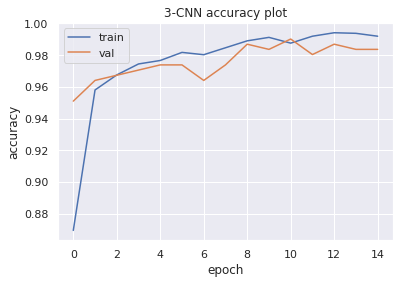

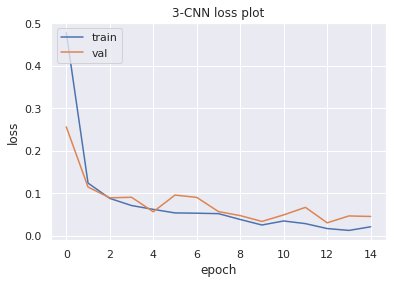

In [ ]:
plot (name)

1523/1523 [==============================] - 3s 2ms/step
Score train:  [0.01518804755245928, 0.9940906167030334]


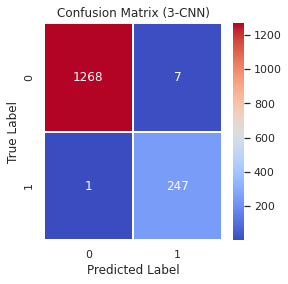

Accuracy: 0.9947
Precision: 0.9724
F1 Score: 0.9841
Cohen Kappa Score: 0.9809
ROC AUC Score: 0.9952
Recall: 0.996
		Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1275
           1       0.97      1.00      0.98       248

    accuracy                           0.99      1523
   macro avg       0.99      1.00      0.99      1523
weighted avg       0.99      0.99      0.99      1523



In [ ]:
y_pred_train = model.predict(X_train)
print('Score train: ', model.evaluate(X_train, y_train))
result(y_train,y_pred_train,name)

170/170 [==============================] - 0s 2ms/step
Score train:  [0.0586309298475766, 0.979411780834198]


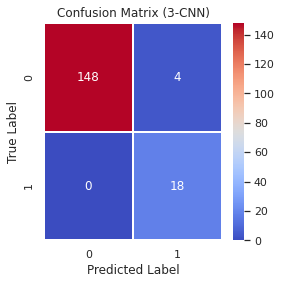

Accuracy: 0.9765
Precision: 0.8182
F1 Score: 0.9
Cohen Kappa Score: 0.8868
ROC AUC Score: 0.9868
Recall: 1.0
		Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       152
           1       0.82      1.00      0.90        18

    accuracy                           0.98       170
   macro avg       0.91      0.99      0.94       170
weighted avg       0.98      0.98      0.98       170



In [ ]:
y_pred_val = model.predict(X_val)
print('Score train: ', model.evaluate(X_val, y_val))
result(y_val,y_pred_val,name)

189/189 [==============================] - 0s 2ms/step
Score train:  [0.03800182550327567, 0.9841269850730896]


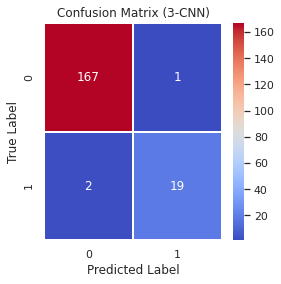

Accuracy: 0.9841
Precision: 0.95
F1 Score: 0.9268
Cohen Kappa Score: 0.9179
ROC AUC Score: 0.9494
Recall: 0.9048
		Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       168
           1       0.95      0.90      0.93        21

    accuracy                           0.98       189
   macro avg       0.97      0.95      0.96       189
weighted avg       0.98      0.98      0.98       189



In [ ]:
y_pred_test = model.predict(X_test)
print('Score train: ', model.evaluate(X_test, y_test))
result(y_test,y_pred_test,name)
    

#4-CNN


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD

# Initialising the CNN
model= Sequential()

# Step 1 - Convolution
model.add(Conv2D(32, (3, 3), input_shape = (224, 224, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

# Adding a second convolutional layer
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

# Adding a third convolutional layer
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

# Adding a fourth convolutional layer
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

# Step 3 - Flattening
model.add(Flatten())

# Step 4 - Full connection
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 2, activation = 'sigmoid'))

# Compiling the CNN
#optim=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
optim=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

model.compile(optimizer = optim, loss = 'binary_crossentropy', metrics = ['accuracy'])

#summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 52, 52, 32)       

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

'''history=model_3_hidden.fit_generator((X_train,y_train),
                         steps_per_epoch = 100,
                         epochs = 25,
                         validation_data = X_test,y_test)
'''
history= model.fit(X_train, y_train, epochs=15, verbose=1, validation_split=0.1)
print('CV accuracy:' , np.average(history.history['val_accuracy'])) 

Train on 1370 samples, validate on 153 samples
Epoch 1/15
1370/1370 [==============================] - 12s 9ms/step - loss: 0.3923 - accuracy: 0.8453 - val_loss: 0.2708 - val_accuracy: 0.8529
Epoch 2/15
1370/1370 [==============================] - 5s 3ms/step - loss: 0.1451 - accuracy: 0.9558 - val_loss: 0.2064 - val_accuracy: 0.9444
Epoch 3/15
1370/1370 [==============================] - 5s 3ms/step - loss: 0.0853 - accuracy: 0.9726 - val_loss: 0.1172 - val_accuracy: 0.9510
Epoch 4/15
1370/1370 [==============================] - 5s 3ms/step - loss: 0.0714 - accuracy: 0.9774 - val_loss: 0.1128 - val_accuracy: 0.9608
Epoch 5/15
1370/1370 [==============================] - 5s 3ms/step - loss: 0.0844 - accuracy: 0.9675 - val_loss: 0.1009 - val_accuracy: 0.9477
Epoch 6/15
1370/1370 [==============================] - 5s 3ms/step - loss: 0.0666 - accuracy: 0.9745 - val_loss: 0.1442 - val_accuracy: 0.9706
Epoch 7/15
1370/1370 [==============================] - 5s 3ms/step - loss: 0.0423 - acc

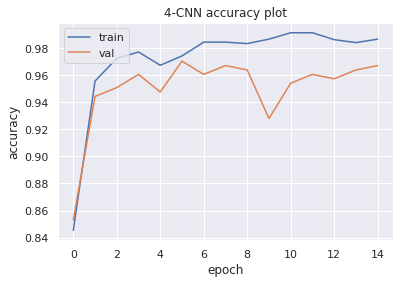

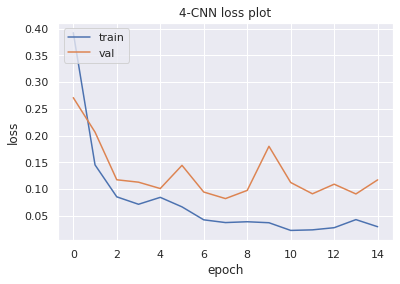

In [ ]:
plot ('4-CNN')

1523/1523 [==============================] - 3s 2ms/step
Score train:  [0.04220758532971946, 0.9898227453231812]


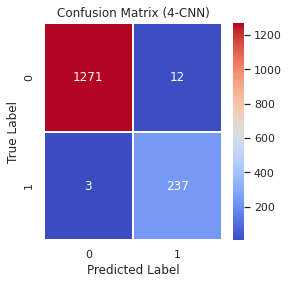

Accuracy: 0.9902
Precision: 0.9518
F1 Score: 0.9693
Cohen Kappa Score: 0.9635
ROC AUC Score: 0.9891
Recall: 0.9875
		Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1283
           1       0.95      0.99      0.97       240

    accuracy                           0.99      1523
   macro avg       0.97      0.99      0.98      1523
weighted avg       0.99      0.99      0.99      1523



In [ ]:
y_pred_train = model.predict(X_train)
print('Score train: ', model.evaluate(X_train, y_train))
result(y_train,y_pred_train,'4-CNN')

170/170 [==============================] - 0s 2ms/step
Score train:  [0.08039202804074567, 0.9764705896377563]


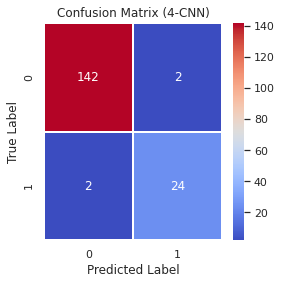

Accuracy: 0.9765
Precision: 0.9231
F1 Score: 0.9231
Cohen Kappa Score: 0.9092
ROC AUC Score: 0.9546
Recall: 0.9231
		Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       144
           1       0.92      0.92      0.92        26

    accuracy                           0.98       170
   macro avg       0.95      0.95      0.95       170
weighted avg       0.98      0.98      0.98       170



In [ ]:
y_pred_val = model.predict(X_val)
print('Score train: ', model.evaluate(X_val, y_val))
result(y_val,y_pred_val,'4-CNN')

189/189 [==============================] - 0s 2ms/step
Score train:  [0.06816638623753553, 0.9788359999656677]


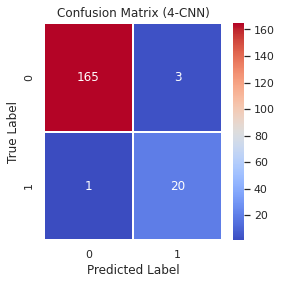

Accuracy: 0.9788
Precision: 0.8696
F1 Score: 0.9091
Cohen Kappa Score: 0.8971
ROC AUC Score: 0.9673
Recall: 0.9524
		Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       168
           1       0.87      0.95      0.91        21

    accuracy                           0.98       189
   macro avg       0.93      0.97      0.95       189
weighted avg       0.98      0.98      0.98       189



In [ ]:
y_pred_test = model.predict(X_test)
print('Score train: ', model.evaluate(X_test, y_test))
result(y_test,y_pred_test,'4-CNN')
    

#5-CNN


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD

# Initialising the CNN
model= Sequential()

# Step 1 - Convolution
model.add(Conv2D(16, (3, 3), input_shape = (224, 224, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

# Adding a second convolutional layer
model.add(Conv2D(16, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

# Adding a third convolutional layer
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

# Adding a fourth convolutional layer
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

# Adding a fifth convolutional layer
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

# Step 3 - Flattening
model.add(Flatten())

# Step 4 - Full connection
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 2, activation = 'sigmoid'))

# Compiling the CNN
#optim=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
optim=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

model.compile(optimizer = optim, loss = 'binary_crossentropy', metrics = ['accuracy'])

#summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 16)      2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 64)       

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

'''history=model_3_hidden.fit_generator((X_train,y_train),
                         steps_per_epoch = 100,
                         epochs = 25,
                         validation_data = X_test,y_test)
'''
history= model.fit(X_train, y_train, epochs=15, verbose=1, validation_split=0.1)
print('CV accuracy:' , np.average(history.history['val_accuracy'])) 

Train on 1370 samples, validate on 153 samples
Epoch 1/15
1370/1370 [==============================] - 11s 8ms/step - loss: 0.4706 - accuracy: 0.8230 - val_loss: 0.4870 - val_accuracy: 0.8562
Epoch 2/15
1370/1370 [==============================] - 4s 3ms/step - loss: 0.3175 - accuracy: 0.8708 - val_loss: 0.3157 - val_accuracy: 0.9248
Epoch 3/15
1370/1370 [==============================] - 4s 3ms/step - loss: 0.1669 - accuracy: 0.9511 - val_loss: 0.1906 - val_accuracy: 0.9477
Epoch 4/15
1370/1370 [==============================] - 4s 3ms/step - loss: 0.1248 - accuracy: 0.9639 - val_loss: 0.1647 - val_accuracy: 0.9641
Epoch 5/15
1370/1370 [==============================] - 4s 3ms/step - loss: 0.1182 - accuracy: 0.9631 - val_loss: 0.1192 - val_accuracy: 0.9608
Epoch 6/15
1370/1370 [==============================] - 4s 3ms/step - loss: 0.0926 - accuracy: 0.9668 - val_loss: 0.1038 - val_accuracy: 0.9739
Epoch 7/15
1370/1370 [==============================] - 4s 3ms/step - loss: 0.0709 - acc

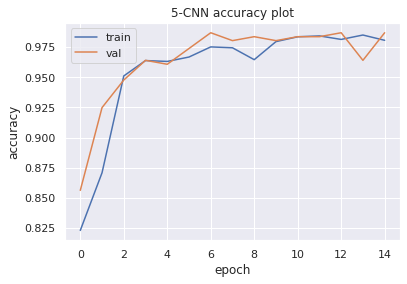

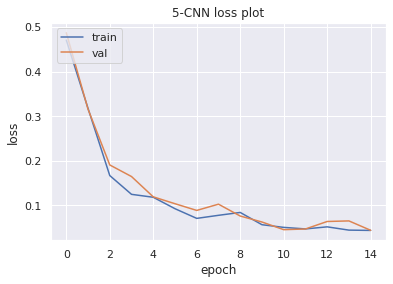

In [ ]:
plot ('5-CNN')

1523/1523 [==============================] - 2s 1ms/step
Score train:  [0.04622175110576189, 0.9904792904853821]


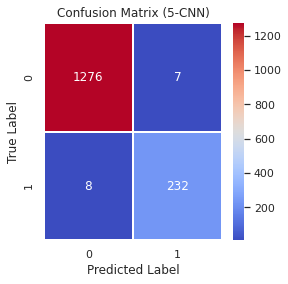

Accuracy: 0.9902
Precision: 0.9707
F1 Score: 0.9687
Cohen Kappa Score: 0.9628
ROC AUC Score: 0.9806
Recall: 0.9667
		Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1283
           1       0.97      0.97      0.97       240

    accuracy                           0.99      1523
   macro avg       0.98      0.98      0.98      1523
weighted avg       0.99      0.99      0.99      1523



In [ ]:
y_pred_train = model.predict(X_train)
print('Score train: ', model.evaluate(X_train, y_train))
result(y_train,y_pred_train,'5-CNN')

170/170 [==============================] - 0s 1ms/step
Score train:  [0.07074411283521091, 0.9764705896377563]


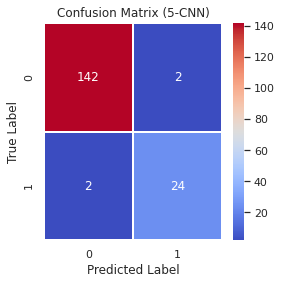

Accuracy: 0.9765
Precision: 0.9231
F1 Score: 0.9231
Cohen Kappa Score: 0.9092
ROC AUC Score: 0.9546
Recall: 0.9231
		Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       144
           1       0.92      0.92      0.92        26

    accuracy                           0.98       170
   macro avg       0.95      0.95      0.95       170
weighted avg       0.98      0.98      0.98       170



In [ ]:
y_pred_val = model.predict(X_val)
print('Score train: ', model.evaluate(X_val, y_val))
result(y_val,y_pred_val,'5-CNN')

189/189 [==============================] - 0s 1ms/step
Score train:  [0.06987903247434626, 0.9576719403266907]


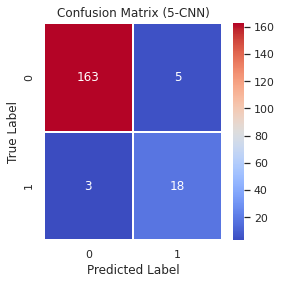

Accuracy: 0.9577
Precision: 0.7826
F1 Score: 0.8182
Cohen Kappa Score: 0.7943
ROC AUC Score: 0.9137
Recall: 0.8571
		Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       168
           1       0.78      0.86      0.82        21

    accuracy                           0.96       189
   macro avg       0.88      0.91      0.90       189
weighted avg       0.96      0.96      0.96       189



In [ ]:
y_pred_test = model.predict(X_test)
print('Score train: ', model.evaluate(X_test, y_test))
result(y_test,y_pred_test,'5-CNN')
    

#6-CNN


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD

# Initialising the CNN
model= Sequential()

# Step 1 - Convolution
model.add(Conv2D(16, (3, 3), input_shape = (224, 224, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

# Adding a second convolutional layer
model.add(Conv2D(16, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

# Adding a third convolutional layer
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

# Adding a fourth convolutional layer
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

# Adding a fifth convolutional layer
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

# Adding a sixth convolutional layer
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

# Step 3 - Flattening
model.add(Flatten())

# Step 4 - Full connection
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 2, activation = 'sigmoid'))

# Compiling the CNN
#optim=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
optim=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

model.compile(optimizer = optim, loss = 'binary_crossentropy', metrics = ['accuracy'])

#summary
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 111, 111, 16)      0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 109, 109, 16)      2320      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 54, 54, 16)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 54, 54, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 52, 52, 64)       

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

'''history=model_3_hidden.fit_generator((X_train,y_train),
                         steps_per_epoch = 100,
                         epochs = 25,
                         validation_data = X_test,y_test)
'''
history= model.fit(X_train, y_train, epochs=15, verbose=1, validation_split=0.1)
print('CV accuracy:' , np.average(history.history['val_accuracy'])) 

Epoch 1/15
43/43 [==============================] - 15s 343ms/step - loss: 0.0331 - accuracy: 0.9891 - val_loss: 0.0537 - val_accuracy: 0.9869
Epoch 2/15
43/43 [==============================] - 14s 333ms/step - loss: 0.0315 - accuracy: 0.9869 - val_loss: 0.0548 - val_accuracy: 0.9935
Epoch 3/15
43/43 [==============================] - 14s 334ms/step - loss: 0.0300 - accuracy: 0.9891 - val_loss: 0.0505 - val_accuracy: 0.9869
Epoch 4/15
43/43 [==============================] - 14s 333ms/step - loss: 0.0244 - accuracy: 0.9934 - val_loss: 0.0545 - val_accuracy: 0.9935
Epoch 5/15
43/43 [==============================] - 14s 331ms/step - loss: 0.0224 - accuracy: 0.9927 - val_loss: 0.0557 - val_accuracy: 0.9869
Epoch 6/15
43/43 [==============================] - 14s 331ms/step - loss: 0.0232 - accuracy: 0.9949 - val_loss: 0.0539 - val_accuracy: 0.9935
Epoch 7/15
43/43 [==============================] - 14s 332ms/step - loss: 0.0185 - accuracy: 0.9927 - val_loss: 0.0519 - val_accuracy: 0.9935

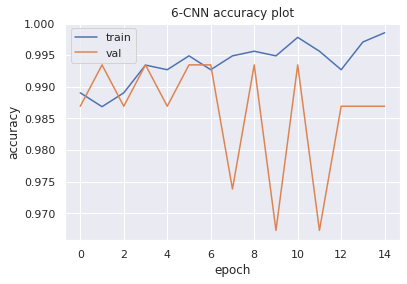

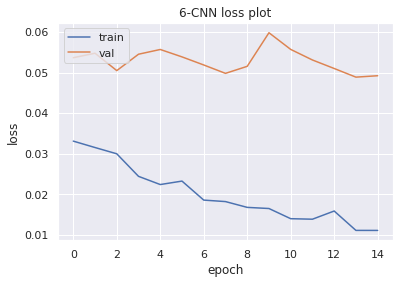

In [ ]:
plot ('6-CNN')

48/48 [==============================] - 14s 293ms/step - loss: 0.0115 - accuracy: 0.9980
Score train:  [0.011505013331770897, 0.9980301856994629]


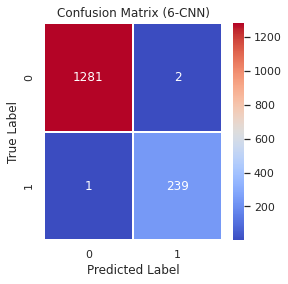

Accuracy: 0.998
Precision: 0.9917
F1 Score: 0.9938
Cohen Kappa Score: 0.9926
ROC AUC Score: 0.9971
Recall: 0.9958
		Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1283
           1       0.99      1.00      0.99       240

    accuracy                           1.00      1523
   macro avg       1.00      1.00      1.00      1523
weighted avg       1.00      1.00      1.00      1523



In [ ]:
y_pred_train = model.predict(X_train)
print('Score train: ', model.evaluate(X_train, y_train))
result(y_train,y_pred_train,'6-CNN')

6/6 [==============================] - 1s 220ms/step - loss: 0.0143 - accuracy: 0.9941
Score train:  [0.01428135298192501, 0.9941176176071167]


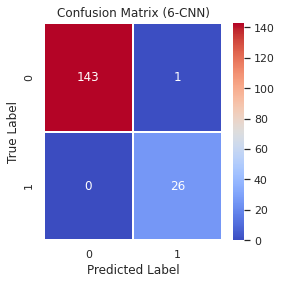

Accuracy: 0.9941
Precision: 0.963
F1 Score: 0.9811
Cohen Kappa Score: 0.9776
ROC AUC Score: 0.9965
Recall: 1.0
		Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       144
           1       0.96      1.00      0.98        26

    accuracy                           0.99       170
   macro avg       0.98      1.00      0.99       170
weighted avg       0.99      0.99      0.99       170



In [ ]:
y_pred_val = model.predict(X_val)
print('Score train: ', model.evaluate(X_val, y_val))
result(y_val,y_pred_val,'6-CNN')

6/6 [==============================] - 1s 244ms/step - loss: 0.0114 - accuracy: 0.9947
Score train:  [0.01142304576933384, 0.9947090148925781]


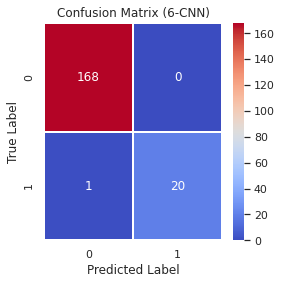

Accuracy: 0.9947
Precision: 1.0
F1 Score: 0.9756
Cohen Kappa Score: 0.9726
ROC AUC Score: 0.9762
Recall: 0.9524
		Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       168
           1       1.00      0.95      0.98        21

    accuracy                           0.99       189
   macro avg       1.00      0.98      0.99       189
weighted avg       0.99      0.99      0.99       189



In [ ]:
y_pred_test = model.predict(X_test)
print('Score train: ', model.evaluate(X_test, y_test))
result(y_test,y_pred_test,'6-CNN')
    

#7-CNN


In [ ]:
name = '7-CNN'
# Initialising the CNN
model= Sequential()

# Step 1 - Convolution
model.add(Conv2D(16, (3, 3),padding='same', input_shape = (224, 224, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

# Adding a second convolutional layer
model.add(Conv2D(32, (2, 2), padding='same',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

# Adding a third convolutional layer
model.add(Conv2D(32, (2, 2), padding='same',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

# Adding a fourth convolutional layer
model.add(Conv2D(32, (2, 2), padding='same',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

# Adding a fifth convolutional layer
model.add(Conv2D(64, (2, 2), padding='same',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

# Adding a sixth convolutional layer
model.add(Conv2D(64, (2, 2),padding='same' ,activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

# Adding a seventh convolutional layer
model.add(Conv2D(64, (2, 2),padding='same' ,activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

# Step 3 - Flattening
model.add(Flatten())

# Step 4 - Full connection
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 2, activation = 'sigmoid'))

# Compiling the CNN
#optim=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
optim=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

model.compile(optimizer = optim, loss = 'binary_crossentropy', metrics = ['accuracy'])

#summary
model.summary()


Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_218 (Conv2D)          (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_203 (MaxPoolin (None, 112, 112, 16)      0         
_________________________________________________________________
dropout_194 (Dropout)        (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_219 (Conv2D)          (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_204 (MaxPoolin (None, 56, 56, 32)        0         
_________________________________________________________________
dropout_195 (Dropout)        (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_220 (Conv2D)          (None, 56, 56, 32)      

In [ ]:
history= model.fit(X_train, y_train, epochs=15, verbose=1, validation_split=0.1)
print('CV accuracy:' , np.average(history.history['val_accuracy'])) 

Train on 1370 samples, validate on 153 samples
Epoch 1/15
1370/1370 [==============================] - 12s 9ms/step - loss: 0.4702 - accuracy: 0.8332 - val_loss: 0.5747 - val_accuracy: 0.9085
Epoch 2/15
1370/1370 [==============================] - 4s 3ms/step - loss: 0.4286 - accuracy: 0.8504 - val_loss: 0.5103 - val_accuracy: 0.9085
Epoch 3/15
1370/1370 [==============================] - 4s 3ms/step - loss: 0.3454 - accuracy: 0.8580 - val_loss: 0.2528 - val_accuracy: 0.9444
Epoch 4/15
1370/1370 [==============================] - 4s 3ms/step - loss: 0.2100 - accuracy: 0.9310 - val_loss: 0.1982 - val_accuracy: 0.9412
Epoch 5/15
1370/1370 [==============================] - 4s 3ms/step - loss: 0.1859 - accuracy: 0.9398 - val_loss: 0.1801 - val_accuracy: 0.9412
Epoch 6/15
1370/1370 [==============================] - 4s 3ms/step - loss: 0.1759 - accuracy: 0.9420 - val_loss: 0.1377 - val_accuracy: 0.9477
Epoch 7/15
1370/1370 [==============================] - 4s 3ms/step - loss: 0.1570 - acc

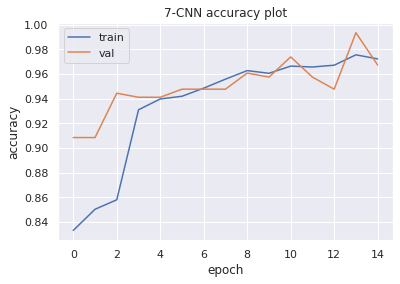

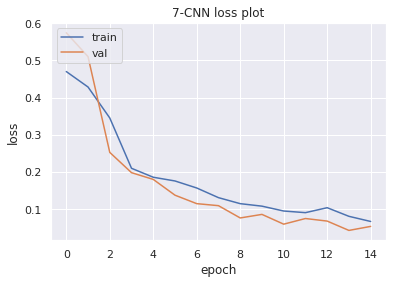

In [ ]:
plot (name)

1523/1523 [==============================] - 2s 1ms/step
Score train:  [0.09519144854228882, 0.9661851525306702]


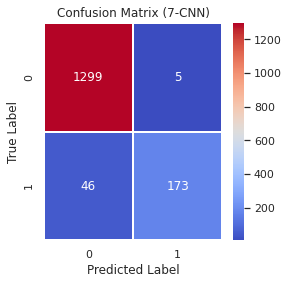

Accuracy: 0.9665
Precision: 0.9719
F1 Score: 0.8715
Cohen Kappa Score: 0.8525
ROC AUC Score: 0.8931
Recall: 0.79
		Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1304
           1       0.97      0.79      0.87       219

    accuracy                           0.97      1523
   macro avg       0.97      0.89      0.93      1523
weighted avg       0.97      0.97      0.97      1523



In [ ]:
y_pred_train = model.predict(X_train)
print('Score train: ', model.evaluate(X_train, y_train))
result(y_train,y_pred_train,name)

170/170 [==============================] - 0s 1ms/step
Score train:  [0.1382048055091325, 0.9470587968826294]


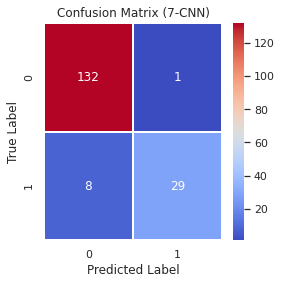

Accuracy: 0.9471
Precision: 0.9667
F1 Score: 0.8657
Cohen Kappa Score: 0.8332
ROC AUC Score: 0.8881
Recall: 0.7838
		Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       133
           1       0.97      0.78      0.87        37

    accuracy                           0.95       170
   macro avg       0.95      0.89      0.92       170
weighted avg       0.95      0.95      0.94       170



In [ ]:
y_pred_val = model.predict(X_val)
print('Score train: ', model.evaluate(X_val, y_val))
result(y_val,y_pred_val,name)

189/189 [==============================] - 0s 1ms/step
Score train:  [0.13510368324855648, 0.9735449552536011]


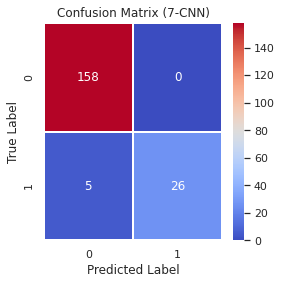

Accuracy: 0.9735
Precision: 1.0
F1 Score: 0.9123
Cohen Kappa Score: 0.8968
ROC AUC Score: 0.9194
Recall: 0.8387
		Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       158
           1       1.00      0.84      0.91        31

    accuracy                           0.97       189
   macro avg       0.98      0.92      0.95       189
weighted avg       0.97      0.97      0.97       189



In [ ]:
y_pred_test = model.predict(X_test)
print('Score train: ', model.evaluate(X_test, y_test))
result(y_test,y_pred_test,name)
    

#8-CNN


In [ ]:
name = '8-CNN'
# Initialising the CNN
model= Sequential()

# Step 1 - Convolution
model.add(Conv2D(16, (2, 2),padding='same', input_shape = (224, 224, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

# Adding a second convolutional layer
model.add(Conv2D(32, (2, 2), padding='same',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

# Adding a third convolutional layer
model.add(Conv2D(32, (2, 2), padding='same',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

# Adding a fourth convolutional layer
model.add(Conv2D(48, (2, 2), padding='same',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

# Adding a fifth convolutional layer
model.add(Conv2D(64, (2, 2), padding='same',activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

# Adding a sixth convolutional layer
model.add(Conv2D(64, (2, 2),padding='same' ,activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

# Adding a seventh convolutional layer
model.add(Conv2D(64, (2, 2),padding='same' ,activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

# Adding a eighth convolutional layer
model.add(Conv2D(64, (2, 2),padding='same' ,activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

# Step 3 - Flattening
model.add(Flatten())

# Step 4 - Full connection
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 2, activation = 'sigmoid'))

# Compiling the CNN
#optim=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
optim=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

model.compile(optimizer = optim, loss = 'binary_crossentropy', metrics = ['accuracy'])

#summary
model.summary()


Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_225 (Conv2D)          (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_210 (MaxPoolin (None, 112, 112, 16)      0         
_________________________________________________________________
dropout_201 (Dropout)        (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_226 (Conv2D)          (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_211 (MaxPoolin (None, 56, 56, 32)        0         
_________________________________________________________________
dropout_202 (Dropout)        (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_227 (Conv2D)          (None, 56, 56, 32)      

In [ ]:

history= model.fit(X_train, y_train, epochs=15, verbose=1, validation_split=0.1)
print('CV accuracy:' , np.average(history.history['val_accuracy'])) 

Train on 1370 samples, validate on 153 samples
Epoch 1/15
1370/1370 [==============================] - 5s 4ms/step - loss: 0.4717 - accuracy: 0.8237 - val_loss: 0.6028 - val_accuracy: 0.9085
Epoch 2/15
1370/1370 [==============================] - 4s 3ms/step - loss: 0.4359 - accuracy: 0.8504 - val_loss: 0.5498 - val_accuracy: 0.9085
Epoch 3/15
1370/1370 [==============================] - 4s 3ms/step - loss: 0.3549 - accuracy: 0.8511 - val_loss: 0.2439 - val_accuracy: 0.9085
Epoch 4/15
1370/1370 [==============================] - 4s 3ms/step - loss: 0.2266 - accuracy: 0.9303 - val_loss: 0.2208 - val_accuracy: 0.9150
Epoch 5/15
1370/1370 [==============================] - 4s 3ms/step - loss: 0.2107 - accuracy: 0.9328 - val_loss: 0.2083 - val_accuracy: 0.9379
Epoch 6/15
1370/1370 [==============================] - 4s 3ms/step - loss: 0.1838 - accuracy: 0.9394 - val_loss: 0.1655 - val_accuracy: 0.9412
Epoch 7/15
1370/1370 [==============================] - 4s 3ms/step - loss: 0.1688 - accu

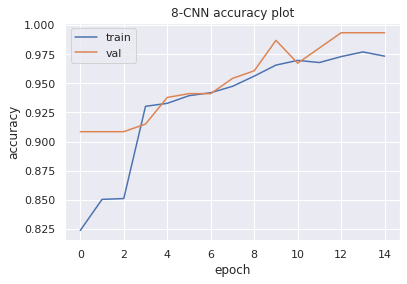

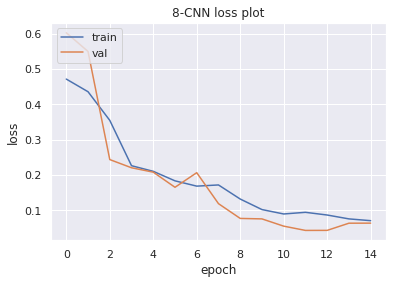

In [ ]:
plot (name)

1523/1523 [==============================] - 2s 2ms/step
Score train:  [0.10287479846417238, 0.9720945358276367]


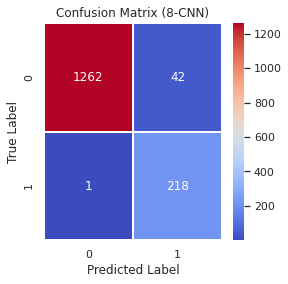

Accuracy: 0.9718
Precision: 0.8385
F1 Score: 0.9102
Cohen Kappa Score: 0.8936
ROC AUC Score: 0.9816
Recall: 0.9954
		Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      1304
           1       0.84      1.00      0.91       219

    accuracy                           0.97      1523
   macro avg       0.92      0.98      0.95      1523
weighted avg       0.98      0.97      0.97      1523



In [ ]:
y_pred_train = model.predict(X_train)
print('Score train: ', model.evaluate(X_train, y_train))
result(y_train,y_pred_train,name)

170/170 [==============================] - 0s 2ms/step
Score train:  [0.11844982539906221, 0.9735293984413147]


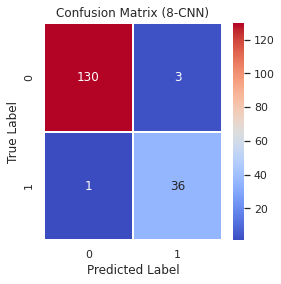

Accuracy: 0.9765
Precision: 0.9231
F1 Score: 0.9474
Cohen Kappa Score: 0.9322
ROC AUC Score: 0.9752
Recall: 0.973
		Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       133
           1       0.92      0.97      0.95        37

    accuracy                           0.98       170
   macro avg       0.96      0.98      0.97       170
weighted avg       0.98      0.98      0.98       170



In [ ]:
y_pred_val = model.predict(X_val)
print('Score train: ', model.evaluate(X_val, y_val))
result(y_val,y_pred_val,name)

189/189 [==============================] - 0s 1ms/step
Score train:  [0.08701169620903712, 0.9788359999656677]


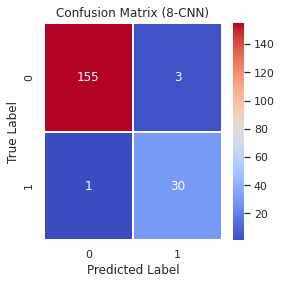

Accuracy: 0.9788
Precision: 0.9091
F1 Score: 0.9375
Cohen Kappa Score: 0.9248
ROC AUC Score: 0.9744
Recall: 0.9677
		Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       158
           1       0.91      0.97      0.94        31

    accuracy                           0.98       189
   macro avg       0.95      0.97      0.96       189
weighted avg       0.98      0.98      0.98       189



In [ ]:
y_pred_test = model.predict(X_test)
print('Score train: ', model.evaluate(X_test, y_test))
result(y_test,y_pred_test,name)
    

#ResNet 50


In [ ]:
# load the ResNet 50 network, ensuring the head FC layer sets are left
# off

name = 'ResNet_50'
baseModel = ResNet50(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

# construct the head of the model that will be placed on top of the
# the base model

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.4)(headModel)
predictions = Dense(2, activation='softmax')(headModel)


# place the head FC model on top of the base model (this will become
# the actual model we will train)

model = Model(inputs=baseModel.input, outputs=predictions)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process

for layer in baseModel.layers:
	layer.trainable = False

# compile our model

print("[INFO] compiling model...")
opt=tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])


# train the head of the network

print("[INFO] training head...")
history= model.fit(X_train, y_train, epochs=20, verbose=1, validation_split=0.1)
print('CV accuracy:' , np.average(history.history['val_accuracy'])) 


94773248/94765736 [==============================] - 1s 0us/step
[INFO] compiling model...
[INFO] training head...
Epoch 1/20
43/43 [==============================] - 13s 304ms/step - loss: 0.4854 - accuracy: 0.8175 - val_loss: 0.3973 - val_accuracy: 0.8562
Epoch 2/20
43/43 [==============================] - 11s 245ms/step - loss: 0.4301 - accuracy: 0.8350 - val_loss: 0.3734 - val_accuracy: 0.8562
Epoch 3/20
43/43 [==============================] - 11s 245ms/step - loss: 0.3974 - accuracy: 0.8358 - val_loss: 0.3387 - val_accuracy: 0.8627
Epoch 4/20
43/43 [==============================] - 11s 244ms/step - loss: 0.3703 - accuracy: 0.8380 - val_loss: 0.3217 - val_accuracy: 0.8627
Epoch 5/20
43/43 [==============================] - 11s 245ms/step - loss: 0.3439 - accuracy: 0.8482 - val_loss: 0.2741 - val_accuracy: 0.8627
Epoch 6/20
43/43 [==============================] - 11s 245ms/step - loss: 0.2999 - accuracy: 0.8584 - val_loss: 0.3146 - val_accuracy: 0.9542
Epoch 7/20
43/43 [=========

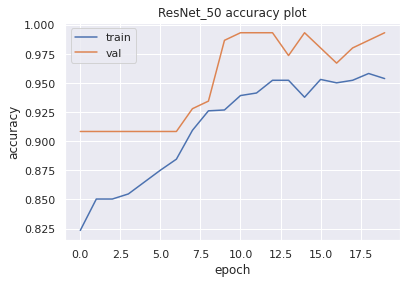

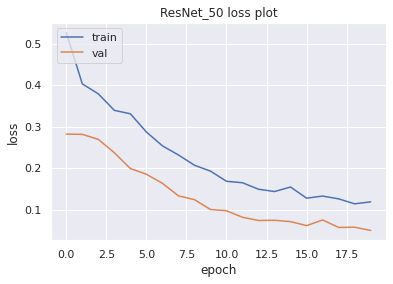

In [ ]:
plot('ResNet_50')

48/48 [==============================] - 10s 210ms/step - loss: 0.0888 - accuracy: 0.9705
Score train:  [0.08882397413253784, 0.9704530239105225]


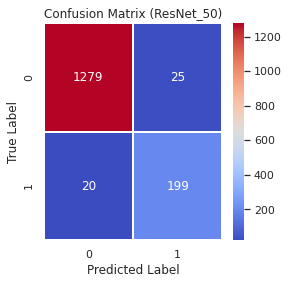

Accuracy: 0.9705
Precision: 0.8884
F1 Score: 0.8984
Cohen Kappa Score: 0.8811
ROC AUC Score: 0.9448
Recall: 0.9087
		Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1304
           1       0.89      0.91      0.90       219

    accuracy                           0.97      1523
   macro avg       0.94      0.94      0.94      1523
weighted avg       0.97      0.97      0.97      1523



In [ ]:
y_pred_train = model.predict(X_train)
print('Score train: ', model.evaluate(X_train, y_train))
result(y_train,y_pred_train,'ResNet_50')

6/6 [==============================] - 1s 159ms/step - loss: 0.1007 - accuracy: 0.9588
Score train:  [0.10066289454698563, 0.9588235020637512]


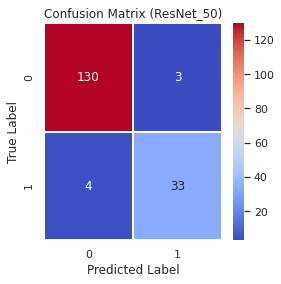

Accuracy: 0.9588
Precision: 0.9167
F1 Score: 0.9041
Cohen Kappa Score: 0.8779
ROC AUC Score: 0.9347
Recall: 0.8919
		Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       133
           1       0.92      0.89      0.90        37

    accuracy                           0.96       170
   macro avg       0.94      0.93      0.94       170
weighted avg       0.96      0.96      0.96       170



In [ ]:
y_pred_val = model.predict(X_val)
print('Score train: ', model.evaluate(X_val, y_val))
result(y_val,y_pred_val,name)

6/6 [==============================] - 1s 176ms/step - loss: 0.0819 - accuracy: 0.9735
Score train:  [0.08187240362167358, 0.9735449552536011]


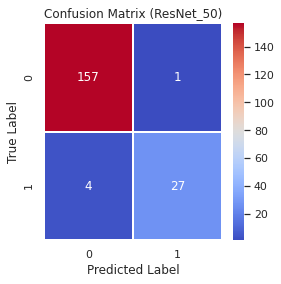

Accuracy: 0.9735
Precision: 0.9643
F1 Score: 0.9153
Cohen Kappa Score: 0.8996
ROC AUC Score: 0.9323
Recall: 0.871
		Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       158
           1       0.96      0.87      0.92        31

    accuracy                           0.97       189
   macro avg       0.97      0.93      0.95       189
weighted avg       0.97      0.97      0.97       189



In [ ]:
y_pred_test = model.predict(X_test)
print('Score train: ', model.evaluate(X_test, y_test))
result(y_test,y_pred_test,name)
    

#MobileNet


In [ ]:
# load the MobileNet network, ensuring the head FC layer sets are left
# off

name = 'MobileNet'
baseModel = MobileNet(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

# construct the head of the model that will be placed on top of the
# the base model

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.4)(headModel)
predictions = Dense(2, activation='softmax')(headModel)


# place the head FC model on top of the base model (this will become
# the actual model we will train)

model = Model(inputs=baseModel.input, outputs=predictions)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process

for layer in baseModel.layers:
	layer.trainable = False

# compile our model

print("[INFO] compiling model...")
opt=tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])


# train the head of the network

print("[INFO] training head...")
history= model.fit(X_train, y_train, epochs=20, verbose=1, validation_split=0.1)
print('CV accuracy:' , np.average(history.history['val_accuracy'])) 


17227776/17225924 [==============================] - 0s 0us/step
[INFO] compiling model...
[INFO] training head...
Epoch 1/20
43/43 [==============================] - 5s 122ms/step - loss: 0.1488 - accuracy: 0.9401 - val_loss: 0.0152 - val_accuracy: 1.0000
Epoch 2/20
43/43 [==============================] - 4s 91ms/step - loss: 0.0337 - accuracy: 0.9891 - val_loss: 0.0119 - val_accuracy: 0.9935
Epoch 3/20
43/43 [==============================] - 4s 91ms/step - loss: 0.0215 - accuracy: 0.9927 - val_loss: 0.0114 - val_accuracy: 1.0000
Epoch 4/20
43/43 [==============================] - 4s 91ms/step - loss: 0.0102 - accuracy: 0.9964 - val_loss: 0.0093 - val_accuracy: 1.0000
Epoch 5/20
43/43 [==============================] - 4s 91ms/step - loss: 0.0069 - accuracy: 0.9993 - val_loss: 0.0120 - val_accuracy: 0.9935
Epoch 6/20
43/43 [==============================] - 4s 92ms/step - loss: 0.0049 - accuracy: 0.9985 - val_loss: 0.0093 - val_accuracy: 1.0000
Epoch 7/20
43/43 [====================

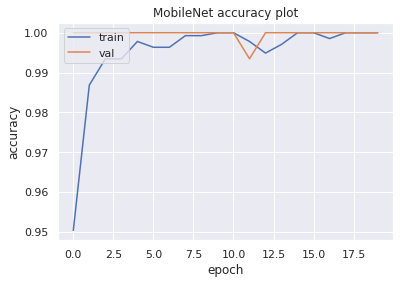

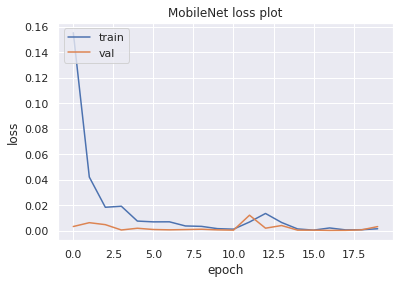

In [ ]:
plot(name)

48/48 [==============================] - 4s 74ms/step - loss: 5.3761e-04 - accuracy: 1.0000
Score train:  [0.0005376060726121068, 1.0]


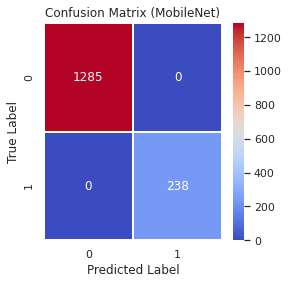

Accuracy: 1.0
Precision: 1.0
F1 Score: 1.0
Cohen Kappa Score: 1.0
ROC AUC Score: 1.0
Recall: 1.0
		Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1285
           1       1.00      1.00      1.00       238

    accuracy                           1.00      1523
   macro avg       1.00      1.00      1.00      1523
weighted avg       1.00      1.00      1.00      1523



In [ ]:
y_pred_train = model.predict(X_train)
print('Score train: ', model.evaluate(X_train, y_train))
result(y_train,y_pred_train,name)

6/6 [==============================] - 0s 53ms/step - loss: 9.7776e-04 - accuracy: 1.0000
Score train:  [0.000977755873464048, 1.0]


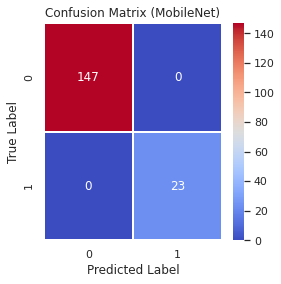

Accuracy: 1.0
Precision: 1.0
F1 Score: 1.0
Cohen Kappa Score: 1.0
ROC AUC Score: 1.0
Recall: 1.0
		Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       147
           1       1.00      1.00      1.00        23

    accuracy                           1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170



In [ ]:
y_pred_val = model.predict(X_val)
print('Score train: ', model.evaluate(X_val, y_val))
result(y_val,y_pred_val,name)

6/6 [==============================] - 0s 63ms/step - loss: 0.0585 - accuracy: 0.9894
Score train:  [0.058535125106573105, 0.9894179701805115]


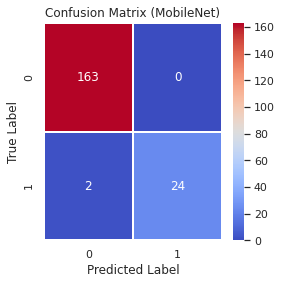

Accuracy: 0.9894
Precision: 1.0
F1 Score: 0.96
Cohen Kappa Score: 0.9539
ROC AUC Score: 0.9615
Recall: 0.9231
		Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       163
           1       1.00      0.92      0.96        26

    accuracy                           0.99       189
   macro avg       0.99      0.96      0.98       189
weighted avg       0.99      0.99      0.99       189



In [ ]:
y_pred_test = model.predict(X_test)
print('Score train: ', model.evaluate(X_test, y_test))
result(y_test,y_pred_test,name)
    

#MobileNetV2


In [ ]:
# load the MMobileNetV2 network, ensuring the head FC layer sets are left
# off

name = 'MobileNetV2'
baseModel = MobileNetV2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

# construct the head of the model that will be placed on top of the
# the base model

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.4)(headModel)
predictions = Dense(2, activation='softmax')(headModel)


# place the head FC model on top of the base model (this will become
# the actual model we will train)

model = Model(inputs=baseModel.input, outputs=predictions)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process

for layer in baseModel.layers:
	layer.trainable = False

# compile our model

print("[INFO] compiling model...")
opt=tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])


# train the head of the network

print("[INFO] training head...")
history= model.fit(X_train, y_train, epochs=20, verbose=1, validation_split=0.1)
print('CV accuracy:' , np.average(history.history['val_accuracy'])) 


9412608/9406464 [==============================] - 0s 0us/step
[INFO] compiling model...
[INFO] training head...
Epoch 1/20
43/43 [==============================] - 6s 137ms/step - loss: 0.1513 - accuracy: 0.9489 - val_loss: 0.0148 - val_accuracy: 0.9935
Epoch 2/20
43/43 [==============================] - 4s 98ms/step - loss: 0.0269 - accuracy: 0.9898 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 3/20
43/43 [==============================] - 4s 97ms/step - loss: 0.0139 - accuracy: 0.9956 - val_loss: 0.0204 - val_accuracy: 0.9869
Epoch 4/20
43/43 [==============================] - 4s 98ms/step - loss: 0.0086 - accuracy: 0.9985 - val_loss: 0.0214 - val_accuracy: 0.9869
Epoch 5/20
43/43 [==============================] - 4s 98ms/step - loss: 0.0091 - accuracy: 0.9964 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 6/20
43/43 [==============================] - 4s 98ms/step - loss: 0.0078 - accuracy: 0.9971 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 7/20
43/43 [======================

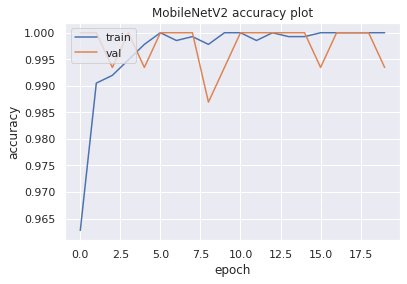

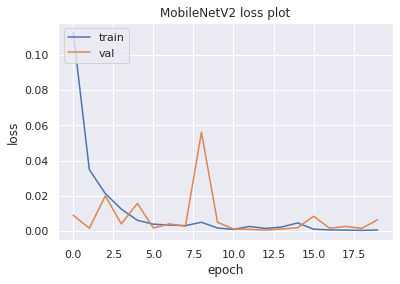

In [ ]:
plot(name)

48/48 [==============================] - 4s 83ms/step - loss: 6.9194e-04 - accuracy: 0.9993
Score train:  [0.0006919359439052641, 0.9993433952331543]


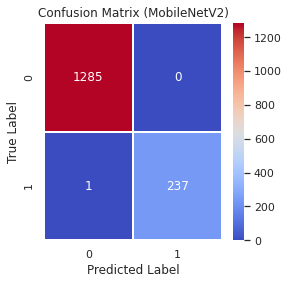

Accuracy: 0.9993
Precision: 1.0
F1 Score: 0.9979
Cohen Kappa Score: 0.9975
ROC AUC Score: 0.9979
Recall: 0.9958
		Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1285
           1       1.00      1.00      1.00       238

    accuracy                           1.00      1523
   macro avg       1.00      1.00      1.00      1523
weighted avg       1.00      1.00      1.00      1523



In [ ]:
y_pred_train = model.predict(X_train)
print('Score train: ', model.evaluate(X_train, y_train))
result(y_train,y_pred_train,name)

6/6 [==============================] - 0s 61ms/step - loss: 0.0012 - accuracy: 1.0000
Score train:  [0.0011817271588370204, 1.0]


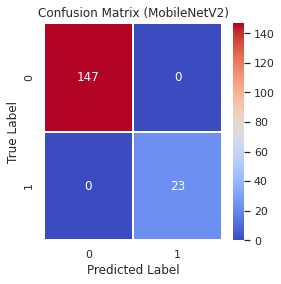

Accuracy: 1.0
Precision: 1.0
F1 Score: 1.0
Cohen Kappa Score: 1.0
ROC AUC Score: 1.0
Recall: 1.0
		Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       147
           1       1.00      1.00      1.00        23

    accuracy                           1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170



In [ ]:
y_pred_val = model.predict(X_val)
print('Score train: ', model.evaluate(X_val, y_val))
result(y_val,y_pred_val,name)

6/6 [==============================] - 0s 66ms/step - loss: 0.0229 - accuracy: 0.9947
Score train:  [0.02290951833128929, 0.9947090148925781]


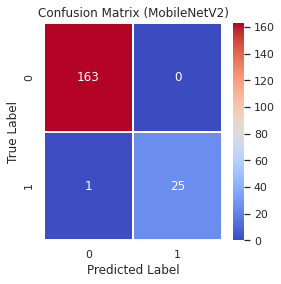

Accuracy: 0.9947
Precision: 1.0
F1 Score: 0.9804
Cohen Kappa Score: 0.9773
ROC AUC Score: 0.9808
Recall: 0.9615
		Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       163
           1       1.00      0.96      0.98        26

    accuracy                           0.99       189
   macro avg       1.00      0.98      0.99       189
weighted avg       0.99      0.99      0.99       189



In [ ]:
y_pred_test = model.predict(X_test)
print('Score train: ', model.evaluate(X_test, y_test))
result(y_test,y_pred_test,name)
    

#VGG19


In [ ]:
# load the VGG19 network, ensuring the head FC layer sets are left
# off

name = 'VGG_19'
baseModel = VGG19(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

# construct the head of the model that will be placed on top of the
# the base model

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.4)(headModel)
predictions = Dense(2, activation='softmax')(headModel)


# place the head FC model on top of the base model (this will become
# the actual model we will train)

model = Model(inputs=baseModel.input, outputs=predictions)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process

for layer in baseModel.layers:
	layer.trainable = False

# compile our model

print("[INFO] compiling model...")
opt=tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])


# train the head of the network

print("[INFO] training head...")
history= model.fit(X_train, y_train, epochs=20, verbose=1, validation_split=0.1)
print('CV accuracy:' , np.average(history.history['val_accuracy'])) 


80142336/80134624 [==============================] - 1s 0us/step
[INFO] compiling model...
[INFO] training head...
Epoch 1/20
43/43 [==============================] - 17s 392ms/step - loss: 0.3346 - accuracy: 0.8701 - val_loss: 0.2068 - val_accuracy: 0.9216
Epoch 2/20
43/43 [==============================] - 16s 383ms/step - loss: 0.1798 - accuracy: 0.9387 - val_loss: 0.1628 - val_accuracy: 0.9477
Epoch 3/20
43/43 [==============================] - 16s 383ms/step - loss: 0.1348 - accuracy: 0.9591 - val_loss: 0.1661 - val_accuracy: 0.9542
Epoch 4/20
43/43 [==============================] - 16s 383ms/step - loss: 0.1173 - accuracy: 0.9628 - val_loss: 0.1235 - val_accuracy: 0.9542
Epoch 5/20
43/43 [==============================] - 16s 383ms/step - loss: 0.0909 - accuracy: 0.9701 - val_loss: 0.1061 - val_accuracy: 0.9542
Epoch 6/20
43/43 [==============================] - 16s 382ms/step - loss: 0.0799 - accuracy: 0.9730 - val_loss: 0.0994 - val_accuracy: 0.9542
Epoch 7/20
43/43 [=========

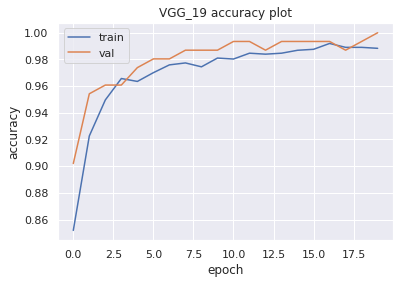

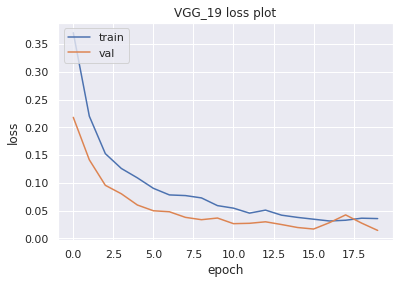

In [ ]:
plot(name)

48/48 [==============================] - 16s 336ms/step - loss: 0.0297 - accuracy: 0.9882
Score train:  [0.029659036546945572, 0.9881812334060669]


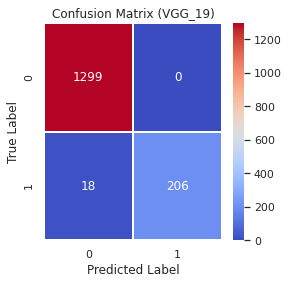

Accuracy: 0.9882
Precision: 1.0
F1 Score: 0.9581
Cohen Kappa Score: 0.9513
ROC AUC Score: 0.9598
Recall: 0.9196
		Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1299
           1       1.00      0.92      0.96       224

    accuracy                           0.99      1523
   macro avg       0.99      0.96      0.98      1523
weighted avg       0.99      0.99      0.99      1523



In [ ]:
y_pred_train = model.predict(X_train)
print('Score train: ', model.evaluate(X_train, y_train))
result(y_train,y_pred_train,name)

6/6 [==============================] - 2s 258ms/step - loss: 0.0494 - accuracy: 0.9882
Score train:  [0.04943069443106651, 0.9882352948188782]


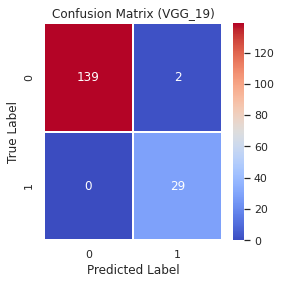

Accuracy: 0.9882
Precision: 0.9355
F1 Score: 0.9667
Cohen Kappa Score: 0.9595
ROC AUC Score: 0.9929
Recall: 1.0
		Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       141
           1       0.94      1.00      0.97        29

    accuracy                           0.99       170
   macro avg       0.97      0.99      0.98       170
weighted avg       0.99      0.99      0.99       170



In [ ]:
y_pred_val = model.predict(X_val)
print('Score train: ', model.evaluate(X_val, y_val))
result(y_val,y_pred_val,name)

6/6 [==============================] - 2s 285ms/step - loss: 0.0768 - accuracy: 0.9788
Score train:  [0.07676135003566742, 0.9788359999656677]


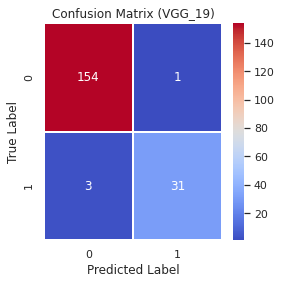

Accuracy: 0.9788
Precision: 0.9688
F1 Score: 0.9394
Cohen Kappa Score: 0.9266
ROC AUC Score: 0.9527
Recall: 0.9118
		Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       155
           1       0.97      0.91      0.94        34

    accuracy                           0.98       189
   macro avg       0.97      0.95      0.96       189
weighted avg       0.98      0.98      0.98       189



In [ ]:
y_pred_test = model.predict(X_test)
print('Score train: ', model.evaluate(X_test, y_test))
result(y_test,y_pred_test,name)
    

#Xception


In [ ]:
# load the Xception network, ensuring the head FC layer sets are left
# off

name = 'Xception'
baseModel = Xception(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

# construct the head of the model that will be placed on top of the
# the base model

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.4)(headModel)
predictions = Dense(2, activation='softmax')(headModel)


# place the head FC model on top of the base model (this will become
# the actual model we will train)

model = Model(inputs=baseModel.input, outputs=predictions)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process

for layer in baseModel.layers:
	layer.trainable = False

# compile our model

print("[INFO] compiling model...")
opt=tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])


# train the head of the network

print("[INFO] training head...")
history= model.fit(X_train, y_train, epochs=20, verbose=1, validation_split=0.1)

print('CV accuracy:' , np.average(history.history['val_accuracy'])) 

83689472/83683744 [==============================] - 1s 0us/step
[INFO] compiling model...
[INFO] training head...
Epoch 1/20
43/43 [==============================] - 18s 426ms/step - loss: 0.0813 - accuracy: 0.9672 - val_loss: 0.0408 - val_accuracy: 0.9869
Epoch 2/20
43/43 [==============================] - 16s 363ms/step - loss: 0.0266 - accuracy: 0.9883 - val_loss: 0.0362 - val_accuracy: 0.9869
Epoch 3/20
43/43 [==============================] - 16s 363ms/step - loss: 0.0173 - accuracy: 0.9942 - val_loss: 0.0404 - val_accuracy: 0.9869
Epoch 4/20
43/43 [==============================] - 16s 363ms/step - loss: 0.0111 - accuracy: 0.9978 - val_loss: 0.0412 - val_accuracy: 0.9869
Epoch 5/20
43/43 [==============================] - 16s 363ms/step - loss: 0.0063 - accuracy: 0.9985 - val_loss: 0.0372 - val_accuracy: 0.9869
Epoch 6/20
43/43 [==============================] - 16s 364ms/step - loss: 0.0057 - accuracy: 0.9985 - val_loss: 0.0379 - val_accuracy: 0.9869
Epoch 7/20
43/43 [=========

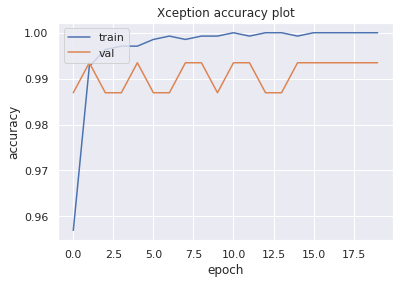

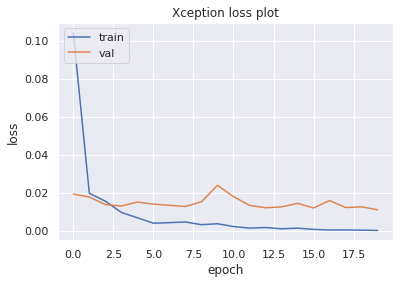

In [ ]:
plot(name)

48/48 [==============================] - 15s 319ms/step - loss: 0.0013 - accuracy: 0.9993
Score train:  [0.0012886327458545566, 0.9993433952331543]


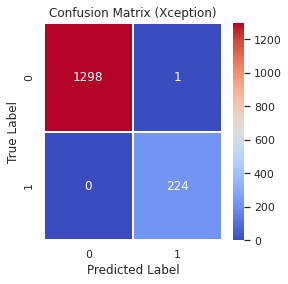

Accuracy: 0.9993
Precision: 0.9956
F1 Score: 0.9978
Cohen Kappa Score: 0.9974
ROC AUC Score: 0.9996
Recall: 1.0
		Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1299
           1       1.00      1.00      1.00       224

    accuracy                           1.00      1523
   macro avg       1.00      1.00      1.00      1523
weighted avg       1.00      1.00      1.00      1523



In [ ]:
y_pred_train = model.predict(X_train)
print('Score train: ', model.evaluate(X_train, y_train))
result(y_train,y_pred_train,name)

6/6 [==============================] - 1s 239ms/step - loss: 0.0643 - accuracy: 0.9882
Score train:  [0.06431453675031662, 0.9882352948188782]


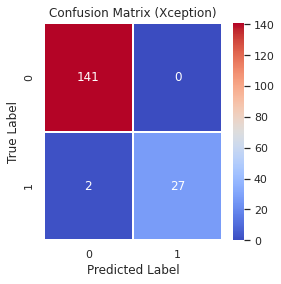

Accuracy: 0.9882
Precision: 1.0
F1 Score: 0.9643
Cohen Kappa Score: 0.9573
ROC AUC Score: 0.9655
Recall: 0.931
		Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       141
           1       1.00      0.93      0.96        29

    accuracy                           0.99       170
   macro avg       0.99      0.97      0.98       170
weighted avg       0.99      0.99      0.99       170



In [ ]:
y_pred_val = model.predict(X_val)
print('Score train: ', model.evaluate(X_val, y_val))
result(y_val,y_pred_val,name)

6/6 [==============================] - 2s 267ms/step - loss: 0.0771 - accuracy: 0.9841
Score train:  [0.07705894112586975, 0.9841269850730896]


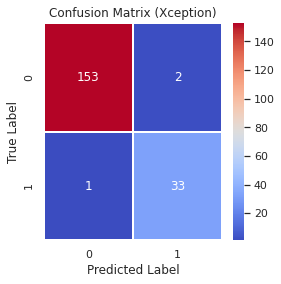

Accuracy: 0.9841
Precision: 0.9429
F1 Score: 0.9565
Cohen Kappa Score: 0.9468
ROC AUC Score: 0.9788
Recall: 0.9706
		Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       155
           1       0.94      0.97      0.96        34

    accuracy                           0.98       189
   macro avg       0.97      0.98      0.97       189
weighted avg       0.98      0.98      0.98       189



In [ ]:
y_pred_test = model.predict(X_test)
print('Score train: ', model.evaluate(X_test, y_test))
result(y_test,y_pred_test,name)
    

#InceptionV3


In [ ]:
# load the InceptionV3 network, ensuring the head FC layer sets are left
# off

name = 'InceptionV3'
baseModel = InceptionV3(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

# construct the head of the model that will be placed on top of the
# the base model

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.4)(headModel)
predictions = Dense(2, activation='softmax')(headModel)


# place the head FC model on top of the base model (this will become
# the actual model we will train)

model = Model(inputs=baseModel.input, outputs=predictions)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process

for layer in baseModel.layers:
	layer.trainable = False

# compile our model

print("[INFO] compiling model...")
opt=tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])


# train the head of the network

print("[INFO] training head...")
history= model.fit(X_train, y_train, epochs=20, verbose=1, validation_split=0.1)
print('CV accuracy:' , np.average(history.history['val_accuracy'])) 


87916544/87910968 [==============================] - 1s 0us/step
[INFO] compiling model...
[INFO] training head...
Epoch 1/20
43/43 [==============================] - 12s 270ms/step - loss: 0.2074 - accuracy: 0.9365 - val_loss: 0.1097 - val_accuracy: 0.9608
Epoch 2/20
43/43 [==============================] - 8s 188ms/step - loss: 0.0720 - accuracy: 0.9715 - val_loss: 0.0556 - val_accuracy: 0.9804
Epoch 3/20
43/43 [==============================] - 8s 188ms/step - loss: 0.0571 - accuracy: 0.9774 - val_loss: 0.0655 - val_accuracy: 0.9804
Epoch 4/20
43/43 [==============================] - 8s 189ms/step - loss: 0.0456 - accuracy: 0.9818 - val_loss: 0.0671 - val_accuracy: 0.9739
Epoch 5/20
43/43 [==============================] - 8s 188ms/step - loss: 0.0288 - accuracy: 0.9861 - val_loss: 0.0493 - val_accuracy: 0.9869
Epoch 6/20
43/43 [==============================] - 8s 187ms/step - loss: 0.0302 - accuracy: 0.9876 - val_loss: 0.0414 - val_accuracy: 0.9804
Epoch 7/20
43/43 [==============

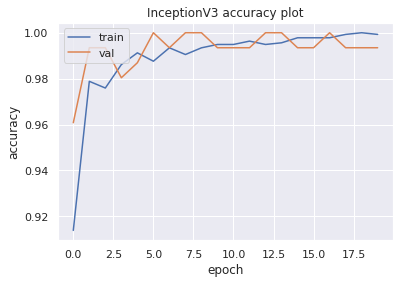

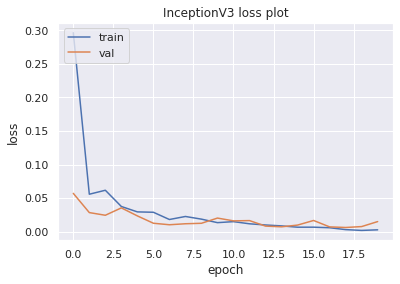

In [ ]:
plot(name)

48/48 [==============================] - 8s 163ms/step - loss: 0.0022 - accuracy: 0.9993
Score train:  [0.0022407579235732555, 0.9993433952331543]


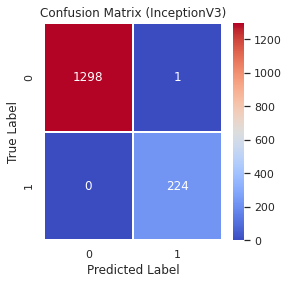

Accuracy: 0.9993
Precision: 0.9956
F1 Score: 0.9978
Cohen Kappa Score: 0.9974
ROC AUC Score: 0.9996
Recall: 1.0
		Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1299
           1       1.00      1.00      1.00       224

    accuracy                           1.00      1523
   macro avg       1.00      1.00      1.00      1523
weighted avg       1.00      1.00      1.00      1523



In [ ]:
y_pred_train = model.predict(X_train)
print('Score train: ', model.evaluate(X_train, y_train))
result(y_train,y_pred_train,name)

6/6 [==============================] - 1s 125ms/step - loss: 0.0403 - accuracy: 0.9824
Score train:  [0.04030264541506767, 0.9823529124259949]


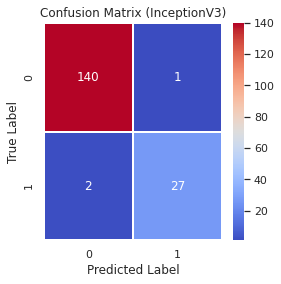

Accuracy: 0.9824
Precision: 0.9643
F1 Score: 0.9474
Cohen Kappa Score: 0.9368
ROC AUC Score: 0.962
Recall: 0.931
		Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       141
           1       0.96      0.93      0.95        29

    accuracy                           0.98       170
   macro avg       0.98      0.96      0.97       170
weighted avg       0.98      0.98      0.98       170



In [ ]:
y_pred_val = model.predict(X_val)
print('Score train: ', model.evaluate(X_val, y_val))
result(y_val,y_pred_val,name)

6/6 [==============================] - 1s 137ms/step - loss: 0.0790 - accuracy: 0.9894
Score train:  [0.07895417511463165, 0.9894179701805115]


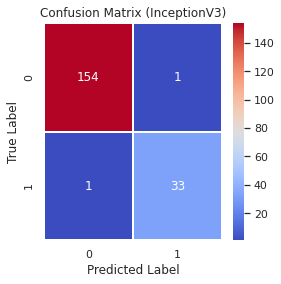

Accuracy: 0.9894
Precision: 0.9706
F1 Score: 0.9706
Cohen Kappa Score: 0.9641
ROC AUC Score: 0.9821
Recall: 0.9706
		Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       155
           1       0.97      0.97      0.97        34

    accuracy                           0.99       189
   macro avg       0.98      0.98      0.98       189
weighted avg       0.99      0.99      0.99       189



In [ ]:
y_pred_test = model.predict(X_test)
print('Score train: ', model.evaluate(X_test, y_test))
result(y_test,y_pred_test,name)
    

#InceptionResNetV2


In [ ]:
# load the InceptionResNetV2 network, ensuring the head FC layer sets are left
# off

name = 'InceptionResNetV2'
baseModel = InceptionResNetV2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

# construct the head of the model that will be placed on top of the
# the base model

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.4)(headModel)
predictions = Dense(2, activation='softmax')(headModel)


# place the head FC model on top of the base model (this will become
# the actual model we will train)

model = Model(inputs=baseModel.input, outputs=predictions)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process

for layer in baseModel.layers:
	layer.trainable = False

# compile our model

print("[INFO] compiling model...")
opt=tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])


# train the head of the network

print("[INFO] training head...")
history= model.fit(X_train, y_train, epochs=20, verbose=1, validation_split=0.1)
print('CV accuracy:' , np.average(history.history['val_accuracy'])) 


219062272/219055592 [==============================] - 2s 0us/step
[INFO] compiling model...
[INFO] training head...
Epoch 1/20
43/43 [==============================] - 25s 571ms/step - loss: 0.2718 - accuracy: 0.9299 - val_loss: 0.0449 - val_accuracy: 0.9869
Epoch 2/20
43/43 [==============================] - 19s 449ms/step - loss: 0.0649 - accuracy: 0.9730 - val_loss: 0.0477 - val_accuracy: 0.9739
Epoch 3/20
43/43 [==============================] - 19s 449ms/step - loss: 0.0511 - accuracy: 0.9803 - val_loss: 0.0269 - val_accuracy: 0.9804
Epoch 4/20
43/43 [==============================] - 19s 448ms/step - loss: 0.0491 - accuracy: 0.9796 - val_loss: 0.0292 - val_accuracy: 0.9869
Epoch 5/20
43/43 [==============================] - 19s 447ms/step - loss: 0.0439 - accuracy: 0.9839 - val_loss: 0.0216 - val_accuracy: 0.9935
Epoch 6/20
43/43 [==============================] - 19s 448ms/step - loss: 0.0339 - accuracy: 0.9883 - val_loss: 0.0111 - val_accuracy: 1.0000
Epoch 7/20
43/43 [=======

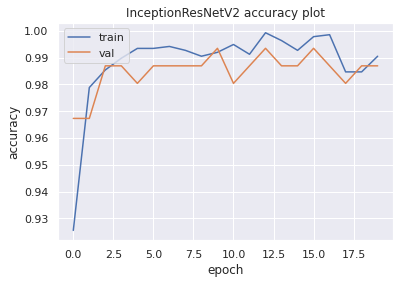

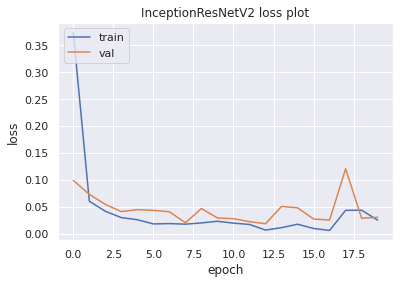

In [ ]:
plot(name)

48/48 [==============================] - 19s 391ms/step - loss: 0.0069 - accuracy: 0.9974
Score train:  [0.006886548828333616, 0.9973735809326172]


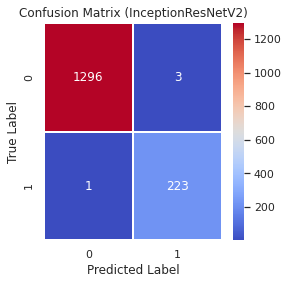

Accuracy: 0.9974
Precision: 0.9867
F1 Score: 0.9911
Cohen Kappa Score: 0.9896
ROC AUC Score: 0.9966
Recall: 0.9955
		Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1299
           1       0.99      1.00      0.99       224

    accuracy                           1.00      1523
   macro avg       0.99      1.00      0.99      1523
weighted avg       1.00      1.00      1.00      1523



In [ ]:
y_pred_train = model.predict(X_train)
print('Score train: ', model.evaluate(X_train, y_train))
result(y_train,y_pred_train,name)

6/6 [==============================] - 2s 297ms/step - loss: 0.1023 - accuracy: 0.9765
Score train:  [0.1022881418466568, 0.9764705896377563]


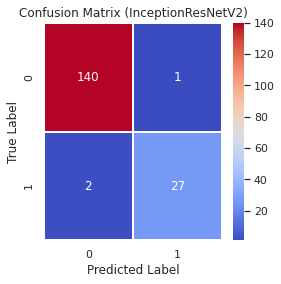

Accuracy: 0.9824
Precision: 0.9643
F1 Score: 0.9474
Cohen Kappa Score: 0.9368
ROC AUC Score: 0.962
Recall: 0.931
		Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       141
           1       0.96      0.93      0.95        29

    accuracy                           0.98       170
   macro avg       0.98      0.96      0.97       170
weighted avg       0.98      0.98      0.98       170



In [ ]:
VGGy_pred_val = model.predict(X_val)
print('Score train: ', model.evaluate(X_val, y_val))
result(y_val,y_pred_val,name)

6/6 [==============================] - 2s 327ms/step - loss: 0.0784 - accuracy: 0.9894
Score train:  [0.07836399227380753, 0.9894179701805115]


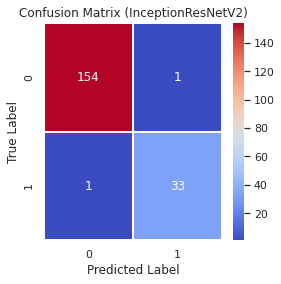

Accuracy: 0.9894
Precision: 0.9706
F1 Score: 0.9706
Cohen Kappa Score: 0.9641
ROC AUC Score: 0.9821
Recall: 0.9706
		Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       155
           1       0.97      0.97      0.97        34

    accuracy                           0.99       189
   macro avg       0.98      0.98      0.98       189
weighted avg       0.99      0.99      0.99       189



In [ ]:
y_pred_test = model.predict(X_test)
print('Score train: ', model.evaluate(X_test, y_test))
result(y_test,y_pred_test,name)
    

#DenseNet169


In [ ]:
# load the DenseNet169 network, ensuring the head FC layer sets are left
# off

name = 'DenseNet169'
baseModel = DenseNet169(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

# construct the head of the model that will be placed on top of the
# the base model

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.4)(headModel)
predictions = Dense(2, activation='softmax')(headModel)


# place the head FC model on top of the base model (this will become
# the actual model we will train)

model = Model(inputs=baseModel.input, outputs=predictions)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process

for layer in baseModel.layers:
	layer.trainable = False

# compile our model

print("[INFO] compiling model...")
opt=tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])


# train the head of the network

print("[INFO] training head...")
history= model.fit(X_train, y_train, epochs=20, verbose=1, validation_split=0.1)
print('CV accuracy:' , np.average(history.history['val_accuracy'])) 


51879936/51877672 [==============================] - 0s 0us/step
[INFO] compiling model...
[INFO] training head...
Epoch 1/20
43/43 [==============================] - 19s 435ms/step - loss: 0.0941 - accuracy: 0.9686 - val_loss: 0.0446 - val_accuracy: 0.9739
Epoch 2/20
43/43 [==============================] - 12s 272ms/step - loss: 0.0284 - accuracy: 0.9861 - val_loss: 0.0151 - val_accuracy: 0.9935
Epoch 3/20
43/43 [==============================] - 12s 273ms/step - loss: 0.0204 - accuracy: 0.9942 - val_loss: 0.0097 - val_accuracy: 0.9935
Epoch 4/20
43/43 [==============================] - 12s 273ms/step - loss: 0.0098 - accuracy: 0.9964 - val_loss: 0.0255 - val_accuracy: 0.9935
Epoch 5/20
43/43 [==============================] - 12s 273ms/step - loss: 0.0154 - accuracy: 0.9942 - val_loss: 0.0066 - val_accuracy: 1.0000
Epoch 6/20
43/43 [==============================] - 12s 273ms/step - loss: 0.0102 - accuracy: 0.9964 - val_loss: 0.0087 - val_accuracy: 0.9935
Epoch 7/20
43/43 [=========

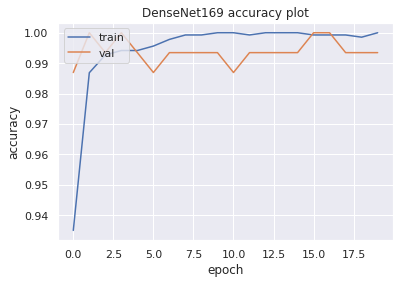

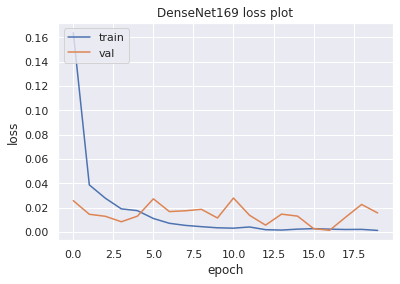

In [ ]:
plot(name)

48/48 [==============================] - 11s 239ms/step - loss: 0.0019 - accuracy: 0.9993
Score train:  [0.001873758272267878, 0.9993433952331543]


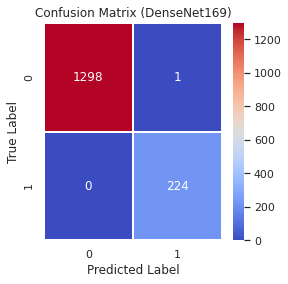

Accuracy: 0.9993
Precision: 0.9956
F1 Score: 0.9978
Cohen Kappa Score: 0.9974
ROC AUC Score: 0.9996
Recall: 1.0
		Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1299
           1       1.00      1.00      1.00       224

    accuracy                           1.00      1523
   macro avg       1.00      1.00      1.00      1523
weighted avg       1.00      1.00      1.00      1523



In [ ]:
y_pred_train = model.predict(X_train)
print('Score train: ', model.evaluate(X_train, y_train))
result(y_train,y_pred_train,name)

6/6 [==============================] - 1s 179ms/step - loss: 0.0029 - accuracy: 1.0000
Score train:  [0.0029274870175868273, 1.0]


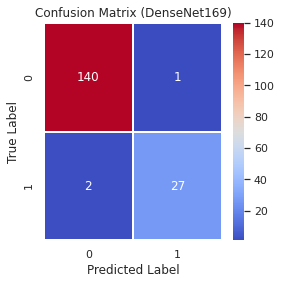

Accuracy: 0.9824
Precision: 0.9643
F1 Score: 0.9474
Cohen Kappa Score: 0.9368
ROC AUC Score: 0.962
Recall: 0.931
		Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       141
           1       0.96      0.93      0.95        29

    accuracy                           0.98       170
   macro avg       0.98      0.96      0.97       170
weighted avg       0.98      0.98      0.98       170



In [ ]:
VGGy_pred_val = model.predict(X_val)
print('Score train: ', model.evaluate(X_val, y_val))
result(y_val,y_pred_val,name)

6/6 [==============================] - 1s 201ms/step - loss: 0.0694 - accuracy: 0.9947
Score train:  [0.06936664879322052, 0.9947090148925781]


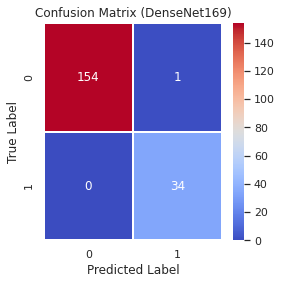

Accuracy: 0.9947
Precision: 0.9714
F1 Score: 0.9855
Cohen Kappa Score: 0.9823
ROC AUC Score: 0.9968
Recall: 1.0
		Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       155
           1       0.97      1.00      0.99        34

    accuracy                           0.99       189
   macro avg       0.99      1.00      0.99       189
weighted avg       0.99      0.99      0.99       189



In [ ]:
y_pred_test = model.predict(X_test)
print('Score train: ', model.evaluate(X_test, y_test))
result(y_test,y_pred_test,name)
    

#DenseNet121


In [ ]:
# load the DenseNet121 network, ensuring the head FC layer sets are left
# off

name = 'DenseNet121'
baseModel = DenseNet121(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

# construct the head of the model that will be placed on top of the
# the base model

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.4)(headModel)
predictions = Dense(2, activation='softmax')(headModel)


# place the head FC model on top of the base model (this will become
# the actual model we will train)

model = Model(inputs=baseModel.input, outputs=predictions)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process

for layer in baseModel.layers:
	layer.trainable = False

# compile our model

print("[INFO] compiling model...")
opt=tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])


# train the head of the network

print("[INFO] training head...")
history= model.fit(X_train, y_train, epochs=20, verbose=1, validation_split=0.1)
print('CV accuracy:' , np.average(history.history['val_accuracy'])) 


29089792/29084464 [==============================] - 0s 0us/step
[INFO] compiling model...
[INFO] training head...
Epoch 1/20
43/43 [==============================] - 12s 280ms/step - loss: 0.2522 - accuracy: 0.9226 - val_loss: 0.0833 - val_accuracy: 0.9608
Epoch 2/20
43/43 [==============================] - 10s 224ms/step - loss: 0.0528 - accuracy: 0.9788 - val_loss: 0.0612 - val_accuracy: 0.9804
Epoch 3/20
43/43 [==============================] - 10s 225ms/step - loss: 0.0383 - accuracy: 0.9876 - val_loss: 0.0766 - val_accuracy: 0.9739
Epoch 4/20
43/43 [==============================] - 10s 223ms/step - loss: 0.0286 - accuracy: 0.9876 - val_loss: 0.0563 - val_accuracy: 0.9804
Epoch 5/20
43/43 [==============================] - 10s 224ms/step - loss: 0.0160 - accuracy: 0.9949 - val_loss: 0.0561 - val_accuracy: 0.9804
Epoch 6/20
43/43 [==============================] - 10s 225ms/step - loss: 0.0124 - accuracy: 0.9971 - val_loss: 0.0686 - val_accuracy: 0.9804
Epoch 7/20
43/43 [=========

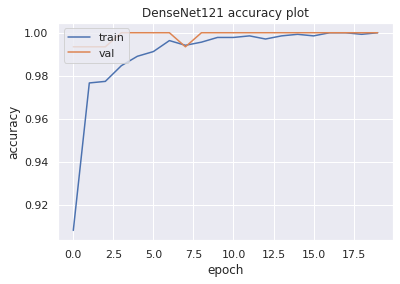

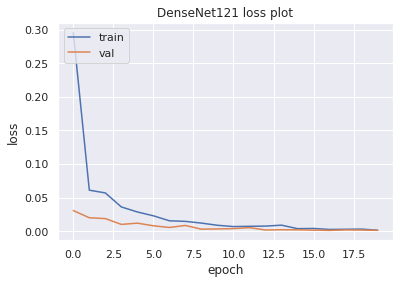

In [ ]:
plot(name)

48/48 [==============================] - 9s 195ms/step - loss: 6.8691e-04 - accuracy: 1.0000
Score train:  [0.0006869134958833456, 1.0]


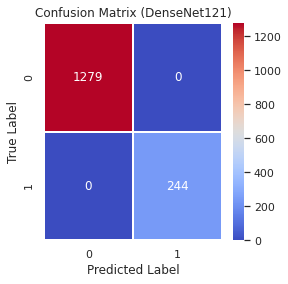

Accuracy: 1.0
Precision: 1.0
F1 Score: 1.0
Cohen Kappa Score: 1.0
ROC AUC Score: 1.0
Recall: 1.0
		Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1279
           1       1.00      1.00      1.00       244

    accuracy                           1.00      1523
   macro avg       1.00      1.00      1.00      1523
weighted avg       1.00      1.00      1.00      1523



In [ ]:
y_pred_train = model.predict(X_train)
print('Score train: ', model.evaluate(X_train, y_train))
result(y_train,y_pred_train,name)

6/6 [==============================] - 1s 147ms/step - loss: 0.0013 - accuracy: 1.0000
Score train:  [0.0012868972262367606, 1.0]


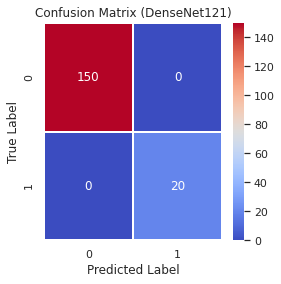

Accuracy: 1.0
Precision: 1.0
F1 Score: 1.0
Cohen Kappa Score: 1.0
ROC AUC Score: 1.0
Recall: 1.0
		Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00        20

    accuracy                           1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170



In [ ]:
y_pred_val = model.predict(X_val)
print('Score train: ', model.evaluate(X_val, y_val))
result(y_val,y_pred_val,name)

6/6 [==============================] - 1s 164ms/step - loss: 0.0492 - accuracy: 0.9894
Score train:  [0.04915827140212059, 0.9894179701805115]


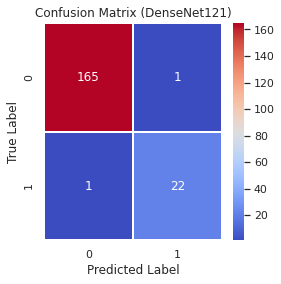

Accuracy: 0.9894
Precision: 0.9565
F1 Score: 0.9565
Cohen Kappa Score: 0.9505
ROC AUC Score: 0.9752
Recall: 0.9565
		Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       166
           1       0.96      0.96      0.96        23

    accuracy                           0.99       189
   macro avg       0.98      0.98      0.98       189
weighted avg       0.99      0.99      0.99       189



In [ ]:
y_pred_test = model.predict(X_test)
print('Score train: ', model.evaluate(X_test, y_test))
result(y_test,y_pred_test,name)
    

#AdaBoostClassifier

In [ ]:
name = 'AdaBoostClassifier'
baseModel =ResNet50(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))


headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.4)(headModel)
predictions = Dense(2, activation='softmax')(headModel)



trans_model = Model(inputs=baseModel.input, outputs=predictions)
trans_train = trans_model.predict(X_train)
model = AdaBoostClassifier()
model.fit(trans_train, np.argmax(y_train, axis=1))


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

Score train:  0.8549


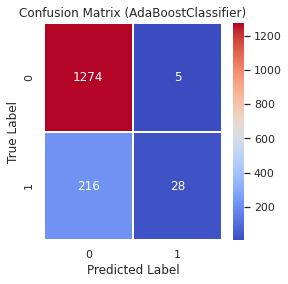

Accuracy: 0.8549
Precision: 0.8485
F1 Score: 0.2022
Cohen Kappa Score: 0.1705
ROC AUC Score: 0.5554
Recall: 0.1148
		Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92      1279
           1       0.85      0.11      0.20       244

    accuracy                           0.85      1523
   macro avg       0.85      0.56      0.56      1523
weighted avg       0.85      0.85      0.81      1523



In [ ]:
y_pred_train = model.predict(trans_train)
print('Score train: ', np.round(model.score(trans_train, np.argmax(y_train, axis=1)),4))
result_1(y_train,y_pred_train,name)

Score train:  0.8824


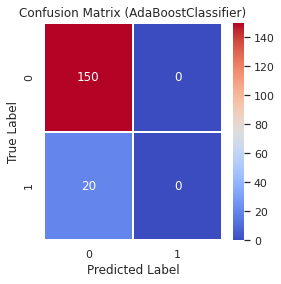

Accuracy: 0.8824
Precision: 0.0
F1 Score: 0.0
Cohen Kappa Score: 0.0
ROC AUC Score: 0.5
Recall: 0.0
		Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94       150
           1       0.00      0.00      0.00        20

    accuracy                           0.88       170
   macro avg       0.44      0.50      0.47       170
weighted avg       0.78      0.88      0.83       170



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
trans_val = trans_model.predict(X_val)
y_pred_val = model.predict(trans_val)
print('Score train: ', np.round(model.score(trans_val, np.argmax(y_val, axis=1)),4))
result_1(y_val,y_pred_val,name)

Score train:  0.873


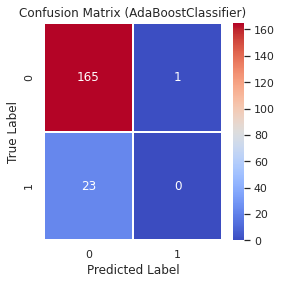

Accuracy: 0.873
Precision: 0.0
F1 Score: 0.0
Cohen Kappa Score: -0.0102
ROC AUC Score: 0.497
Recall: 0.0
		Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       166
           1       0.00      0.00      0.00        23

    accuracy                           0.87       189
   macro avg       0.44      0.50      0.47       189
weighted avg       0.77      0.87      0.82       189



In [ ]:
trans_test = trans_model.predict(X_test)
y_pred_test = model.predict(trans_test)
print('Score train: ', np.round(model.score(trans_test, np.argmax(y_test, axis=1)),4))
result_1(y_test,y_pred_test,name)
    

#KNeighborsClassifier

In [ ]:
name = 'KNeighborsClassifier'
baseModel =ResNet50(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))


headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.4)(headModel)
predictions = Dense(2, activation='softmax')(headModel)



trans_model = Model(inputs=baseModel.input, outputs=predictions)
trans_train = trans_model.predict(X_train)
model = KNeighborsClassifier(n_neighbors=3)
model.fit(trans_train, np.argmax(y_train, axis=1))


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Score train:  0.9212


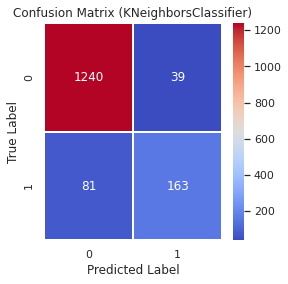

Accuracy: 0.9212
Precision: 0.8069
F1 Score: 0.7309
Cohen Kappa Score: 0.6853
ROC AUC Score: 0.8188
Recall: 0.668
		Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      1279
           1       0.81      0.67      0.73       244

    accuracy                           0.92      1523
   macro avg       0.87      0.82      0.84      1523
weighted avg       0.92      0.92      0.92      1523



In [ ]:
y_pred_train = model.predict(trans_train)
print('Score train: ', np.round(model.score(trans_train, np.argmax(y_train, axis=1)),4))
result_1(y_train,y_pred_train,name)

Score train:  0.8588


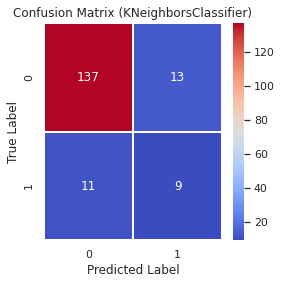

Accuracy: 0.8588
Precision: 0.4091
F1 Score: 0.4286
Cohen Kappa Score: 0.3482
ROC AUC Score: 0.6817
Recall: 0.45
		Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       150
           1       0.41      0.45      0.43        20

    accuracy                           0.86       170
   macro avg       0.67      0.68      0.67       170
weighted avg       0.86      0.86      0.86       170



In [ ]:
trans_val = trans_model.predict(X_val)
y_pred_val = model.predict(trans_val)
print('Score train: ', np.round(model.score(trans_val, np.argmax(y_val, axis=1)),4))
result_1(y_val,y_pred_val,name)

Score train:  0.873


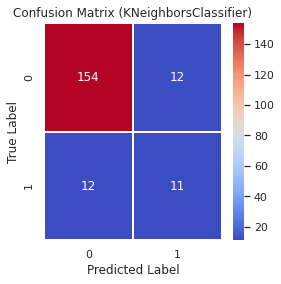

Accuracy: 0.873
Precision: 0.4783
F1 Score: 0.4783
Cohen Kappa Score: 0.406
ROC AUC Score: 0.703
Recall: 0.4783
		Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       166
           1       0.48      0.48      0.48        23

    accuracy                           0.87       189
   macro avg       0.70      0.70      0.70       189
weighted avg       0.87      0.87      0.87       189



In [ ]:
trans_test = trans_model.predict(X_test)
y_pred_test = model.predict(trans_test)
print('Score train: ', np.round(model.score(trans_test, np.argmax(y_test, axis=1)),4))
result_1(y_test,y_pred_test,name)
    

#RandomForestClassifier

In [ ]:
name = 'RandomForestClassifier'
baseModel = ResNet50(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))


headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.4)(headModel)
predictions = Dense(2, activation='softmax')(headModel)



trans_model = Model(inputs=baseModel.input, outputs=predictions)
trans_train = trans_model.predict(X_train)
model = RandomForestClassifier()
model.fit(trans_train, np.argmax(y_train, axis=1))


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Score train:  0.998


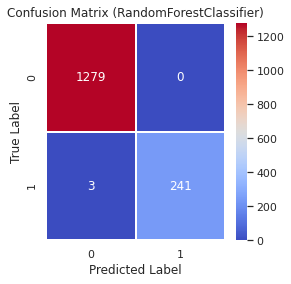

Accuracy: 0.998
Precision: 1.0
F1 Score: 0.9938
Cohen Kappa Score: 0.9926
ROC AUC Score: 0.9939
Recall: 0.9877
		Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1279
           1       1.00      0.99      0.99       244

    accuracy                           1.00      1523
   macro avg       1.00      0.99      1.00      1523
weighted avg       1.00      1.00      1.00      1523



In [ ]:
y_pred_train = model.predict(trans_train)
print('Score train: ', np.round(model.score(trans_train, np.argmax(y_train, axis=1)),4))
result_1(y_train,y_pred_train,name)

Score train:  0.8412


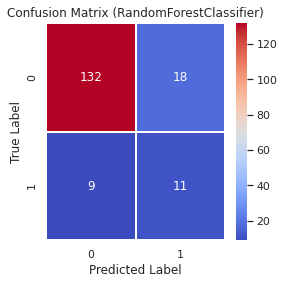

Accuracy: 0.8412
Precision: 0.3793
F1 Score: 0.449
Cohen Kappa Score: 0.3598
ROC AUC Score: 0.715
Recall: 0.55
		Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91       150
           1       0.38      0.55      0.45        20

    accuracy                           0.84       170
   macro avg       0.66      0.72      0.68       170
weighted avg       0.87      0.84      0.85       170



In [ ]:
trans_val = trans_model.predict(X_val)
y_pred_val = model.predict(trans_val)
print('Score train: ', np.round(model.score(trans_val, np.argmax(y_val, axis=1)),4))
result_1(y_val,y_pred_val,name)

Score train:  0.9153


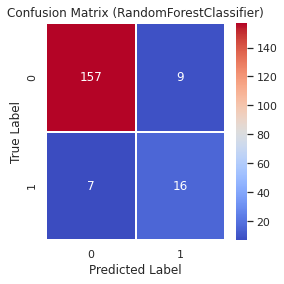

Accuracy: 0.9153
Precision: 0.64
F1 Score: 0.6667
Cohen Kappa Score: 0.6183
ROC AUC Score: 0.8207
Recall: 0.6957
		Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       166
           1       0.64      0.70      0.67        23

    accuracy                           0.92       189
   macro avg       0.80      0.82      0.81       189
weighted avg       0.92      0.92      0.92       189



In [ ]:
trans_test = trans_model.predict(X_test)
y_pred_test = model.predict(trans_test)
print('Score train: ', np.round(model.score(trans_test, np.argmax(y_test, axis=1)),4))
result_1(y_test,y_pred_test,name)
    

#SVC

In [ ]:
name = 'SVC'
baseModel =ResNet50(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))


headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.4)(headModel)
predictions = Dense(2, activation='softmax')(headModel)



trans_model = Model(inputs=baseModel.input, outputs=predictions)
trans_train = trans_model.predict(X_train)
model = SVC(kernel='rbf', random_state=0) 
model.fit(trans_train, np.argmax(y_train, axis=1))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Score train:  0.8398


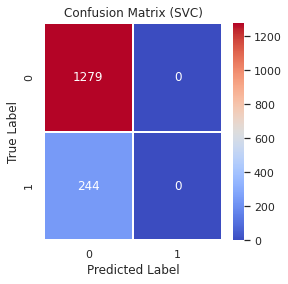

Accuracy: 0.8398
Precision: 0.0
F1 Score: 0.0
Cohen Kappa Score: 0.0
ROC AUC Score: 0.5
Recall: 0.0
		Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1279
           1       0.00      0.00      0.00       244

    accuracy                           0.84      1523
   macro avg       0.42      0.50      0.46      1523
weighted avg       0.71      0.84      0.77      1523



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred_train = model.predict(trans_train)
print('Score train: ', np.round(model.score(trans_train, np.argmax(y_train, axis=1)),4))
result_1(y_train,y_pred_train,name)

Score train:  0.8824


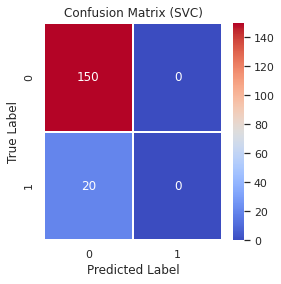

Accuracy: 0.8824
Precision: 0.0
F1 Score: 0.0
Cohen Kappa Score: 0.0
ROC AUC Score: 0.5
Recall: 0.0
		Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94       150
           1       0.00      0.00      0.00        20

    accuracy                           0.88       170
   macro avg       0.44      0.50      0.47       170
weighted avg       0.78      0.88      0.83       170



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
trans_val = trans_model.predict(X_val)
y_pred_val = model.predict(trans_val)
print('Score train: ', np.round(model.score(trans_val, np.argmax(y_val, axis=1)),4))
result_1(y_val,y_pred_val,name)

Score train:  0.8783


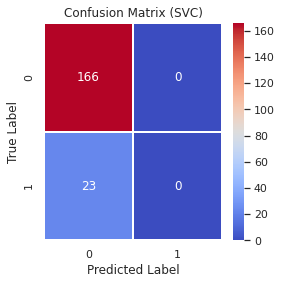

Accuracy: 0.8783
Precision: 0.0
F1 Score: 0.0
Cohen Kappa Score: 0.0
ROC AUC Score: 0.5
Recall: 0.0
		Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94       166
           1       0.00      0.00      0.00        23

    accuracy                           0.88       189
   macro avg       0.44      0.50      0.47       189
weighted avg       0.77      0.88      0.82       189



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
trans_test = trans_model.predict(X_test)
y_pred_test = model.predict(trans_test)
print('Score train: ', np.round(model.score(trans_test, np.argmax(y_test, axis=1)),4))
result_1(y_test,y_pred_test,name)
    

#XGB

In [ ]:
name = 'XGB'
baseModel =ResNet50(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))


headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.4)(headModel)
predictions = Dense(2, activation='softmax')(headModel)



trans_model = Model(inputs=baseModel.input, outputs=predictions)
trans_train = trans_model.predict(X_train)
model = XGBClassifier()
model.fit(trans_train, np.argmax(y_train, axis=1))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Score train:  0.8464


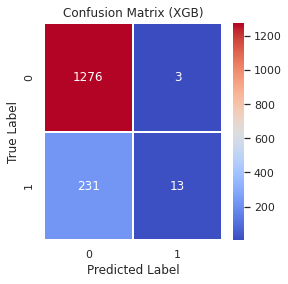

Accuracy: 0.8464
Precision: 0.8125
F1 Score: 0.1
Cohen Kappa Score: 0.0819
ROC AUC Score: 0.5255
Recall: 0.0533
		Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      1279
           1       0.81      0.05      0.10       244

    accuracy                           0.85      1523
   macro avg       0.83      0.53      0.51      1523
weighted avg       0.84      0.85      0.79      1523



In [ ]:
y_pred_train = model.predict(trans_train)
print('Score train: ', np.round(model.score(trans_train, np.argmax(y_train, axis=1)),4))
result_1(y_train,y_pred_train,name)

Score train:  0.8765


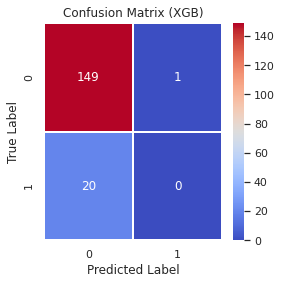

Accuracy: 0.8765
Precision: 0.0
F1 Score: 0.0
Cohen Kappa Score: -0.0113
ROC AUC Score: 0.4967
Recall: 0.0
		Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       150
           1       0.00      0.00      0.00        20

    accuracy                           0.88       170
   macro avg       0.44      0.50      0.47       170
weighted avg       0.78      0.88      0.82       170



In [ ]:
trans_val = trans_model.predict(X_val)
y_pred_val = model.predict(trans_val)
print('Score train: ', np.round(model.score(trans_val, np.argmax(y_val, axis=1)),4))
result_1(y_val,y_pred_val,name)

Score train:  0.873


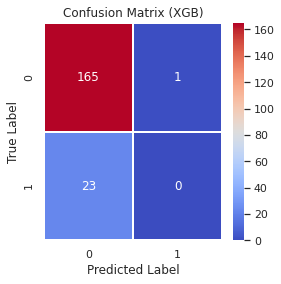

Accuracy: 0.873
Precision: 0.0
F1 Score: 0.0
Cohen Kappa Score: -0.0102
ROC AUC Score: 0.497
Recall: 0.0
		Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       166
           1       0.00      0.00      0.00        23

    accuracy                           0.87       189
   macro avg       0.44      0.50      0.47       189
weighted avg       0.77      0.87      0.82       189



In [ ]:
trans_test = trans_model.predict(X_test)
y_pred_test = model.predict(trans_test)
print('Score train: ', np.round(model.score(trans_test, np.argmax(y_test, axis=1)),4))
result_1(y_test,y_pred_test,name)
    